# Employee Attrition

In [30]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
sns.set_style('darkgrid')

In [32]:
%matplotlib inline
%config Inline.backend.figure_format = 'retina'

In [33]:
# Reading the CSV files
existing_emp = pd.read_csv(r"Existing employees.csv")
left_emp = pd.read_csv(r"Employees who have left.csv")


In [34]:
#observing the first five rows
existing_emp.head()

Emp ID  satisfaction_level  last_evaluation  number_project  \
0    2001                0.58             0.74               4   
1    2002                0.82             0.67               2   
2    2003                0.45             0.69               5   
3    2004                0.78             0.82               5   
4    2005                0.49             0.60               3   

   average_montly_hours  time_spend_company  Work_accident  \
0                   215                   3              0   
1                   202                   3              0   
2                   193                   3              0   
3                   247                   3              0   
4                   214                   2              0   

   promotion_last_5years   dept salary  
0                      0  sales    low  
1                      0  sales    low  
2                      0  sales    low  
3                      0  sales    low  
4                      0  sales    low

In [35]:
#observing the first five rows
left_emp.head()

Emp ID  satisfaction_level  last_evaluation  number_project  \
0       1                0.38             0.53               2   
1       2                0.80             0.86               5   
2       3                0.11             0.88               7   
3       4                0.72             0.87               5   
4       5                0.37             0.52               2   

   average_montly_hours  time_spend_company  Work_accident  \
0                   157                   3              0   
1                   262                   6              0   
2                   272                   4              0   
3                   223                   5              0   
4                   159                   3              0   

   promotion_last_5years   dept  salary  
0                      0  sales     low  
1                      0  sales  medium  
2                      0  sales  medium  
3                      0  sales     low  
4                      0  sales     low

In [36]:
#observing the last five rows
left_emp.tail()

Emp ID  satisfaction_level  last_evaluation  number_project  \
3566   14995                0.40             0.57               2   
3567   14996                0.37             0.48               2   
3568   14997                0.37             0.53               2   
3569   14998                0.11             0.96               6   
3570   14999                0.37             0.52               2   

      average_montly_hours  time_spend_company  Work_accident  \
3566                   151                   3              0   
3567                   160                   3              0   
3568                   143                   3              0   
3569                   280                   4              0   
3570                   158                   3              0   

      promotion_last_5years     dept salary  
3566                      0  support    low  
3567                      0  support    low  
3568                      0  support    low  
3569                      0  support    low  
3570                      0  support    low

In [37]:
#observing the lasdt five rows
existing_emp.tail()

Emp ID  satisfaction_level  last_evaluation  number_project  \
11423   14207                0.90             0.55               3   
11424   14208                0.74             0.95               5   
11425   14209                0.85             0.54               3   
11426   14210                0.33             0.65               3   
11427   14211                0.50             0.73               4   

       average_montly_hours  time_spend_company  Work_accident  \
11423                   259                  10              1   
11424                   266                  10              0   
11425                   185                  10              0   
11426                   172                  10              0   
11427                   180                   3              0   

       promotion_last_5years        dept salary  
11423                      1  management   high  
11424                      1  management   high  
11425                      1  management   high  
11426                      1   marketing   high  
11427                      0          IT    low

In [38]:
# checking the info
existing_emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11428 entries, 0 to 11427
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp ID                 11428 non-null  int64  
 1   satisfaction_level     11428 non-null  float64
 2   last_evaluation        11428 non-null  float64
 3   number_project         11428 non-null  int64  
 4   average_montly_hours   11428 non-null  int64  
 5   time_spend_company     11428 non-null  int64  
 6   Work_accident          11428 non-null  int64  
 7   promotion_last_5years  11428 non-null  int64  
 8   dept                   11428 non-null  object 
 9   salary                 11428 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 892.9+ KB


In [39]:
# checking the info
left_emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp ID                 3571 non-null   int64  
 1   satisfaction_level     3571 non-null   float64
 2   last_evaluation        3571 non-null   float64
 3   number_project         3571 non-null   int64  
 4   average_montly_hours   3571 non-null   int64  
 5   time_spend_company     3571 non-null   int64  
 6   Work_accident          3571 non-null   int64  
 7   promotion_last_5years  3571 non-null   int64  
 8   dept                   3571 non-null   object 
 9   salary                 3571 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 279.1+ KB


In [40]:
# checking for null values
existing_emp.isnull().mean()

Emp ID                   0.0
satisfaction_level       0.0
last_evaluation          0.0
number_project           0.0
average_montly_hours     0.0
time_spend_company       0.0
Work_accident            0.0
promotion_last_5years    0.0
dept                     0.0
salary                   0.0
dtype: float64

In [41]:
# checking for null values
left_emp.isnull().mean()

Emp ID                   0.0
satisfaction_level       0.0
last_evaluation          0.0
number_project           0.0
average_montly_hours     0.0
time_spend_company       0.0
Work_accident            0.0
promotion_last_5years    0.0
dept                     0.0
salary                   0.0
dtype: float64

In [42]:
# checking for the description of the numerical attributes
left_emp.describe().T

count         mean          std     min     25%  \
Emp ID                 3571.0  6500.439653  6266.484705    1.00  893.50   
satisfaction_level     3571.0     0.440098     0.263933    0.09    0.13   
last_evaluation        3571.0     0.718113     0.197673    0.45    0.52   
number_project         3571.0     3.855503     1.818165    2.00    2.00   
average_montly_hours   3571.0   207.419210    61.202825  126.00  146.00   
time_spend_company     3571.0     3.876505     0.977698    2.00    3.00   
Work_accident          3571.0     0.047326     0.212364    0.00    0.00   
promotion_last_5years  3571.0     0.005321     0.072759    0.00    0.00   

                           50%       75%       max  
Emp ID                 1786.00  12678.50  14999.00  
satisfaction_level        0.41      0.73      0.92  
last_evaluation           0.79      0.90      1.00  
number_project            4.00      6.00      7.00  
average_montly_hours    224.00    262.00    310.00  
time_spend_company        4.00      5.00      6.00  
Work_accident             0.00      0.00      1.00  
promotion_last_5years     0.00      0.00      1.00

In [43]:
# adding a colomn to describe if an employee left or exist
existing_emp['Quit'] = 'No'
left_emp['Quit'] = 'Yes'


In [44]:
# adding a colomn to indicate an attrition
existing_emp['Attrition'] = '0'
left_emp['Attrition'] = '1'

In [45]:
# checking for the added column
existing_emp

Emp ID  satisfaction_level  last_evaluation  number_project  \
0        2001                0.58             0.74               4   
1        2002                0.82             0.67               2   
2        2003                0.45             0.69               5   
3        2004                0.78             0.82               5   
4        2005                0.49             0.60               3   
...       ...                 ...              ...             ...   
11423   14207                0.90             0.55               3   
11424   14208                0.74             0.95               5   
11425   14209                0.85             0.54               3   
11426   14210                0.33             0.65               3   
11427   14211                0.50             0.73               4   

       average_montly_hours  time_spend_company  Work_accident  \
0                       215                   3              0   
1                       202                   3              0   
2                       193                   3              0   
3                       247                   3              0   
4                       214                   2              0   
...                     ...                 ...            ...   
11423                   259                  10              1   
11424                   266                  10              0   
11425                   185                  10              0   
11426                   172                  10              0   
11427                   180                   3              0   

       promotion_last_5years        dept salary Quit Attrition  
0                          0       sales    low   No         0  
1                          0       sales    low   No         0  
2                          0       sales    low   No         0  
3                          0       sales    low   No         0  
4                          0       sales    low   No         0  
...                      ...         ...    ...  ...       ...  
11423                      1  management   high   No         0  
11424                      1  management   high   No         0  
11425                      1  management   high   No         0  
11426                      1   marketing   high   No         0  
11427                      0          IT    low   No         0  

[11428 rows x 12 columns]

In [46]:
# checking for the added column
left_emp

Emp ID  satisfaction_level  last_evaluation  number_project  \
0          1                0.38             0.53               2   
1          2                0.80             0.86               5   
2          3                0.11             0.88               7   
3          4                0.72             0.87               5   
4          5                0.37             0.52               2   
...      ...                 ...              ...             ...   
3566   14995                0.40             0.57               2   
3567   14996                0.37             0.48               2   
3568   14997                0.37             0.53               2   
3569   14998                0.11             0.96               6   
3570   14999                0.37             0.52               2   

      average_montly_hours  time_spend_company  Work_accident  \
0                      157                   3              0   
1                      262                   6              0   
2                      272                   4              0   
3                      223                   5              0   
4                      159                   3              0   
...                    ...                 ...            ...   
3566                   151                   3              0   
3567                   160                   3              0   
3568                   143                   3              0   
3569                   280                   4              0   
3570                   158                   3              0   

      promotion_last_5years     dept  salary Quit Attrition  
0                         0    sales     low  Yes         1  
1                         0    sales  medium  Yes         1  
2                         0    sales  medium  Yes         1  
3                         0    sales     low  Yes         1  
4                         0    sales     low  Yes         1  
...                     ...      ...     ...  ...       ...  
3566                      0  support     low  Yes         1  
3567                      0  support     low  Yes         1  
3568                      0  support     low  Yes         1  
3569                      0  support     low  Yes         1  
3570                      0  support     low  Yes         1  

[3571 rows x 12 columns]

In [47]:
# merging both dataframe to a single dataframe
employee_df = pd.concat([left_emp, existing_emp])

In [48]:
# Calling the datafeame
employee_df

Emp ID  satisfaction_level  last_evaluation  number_project  \
0           1                0.38             0.53               2   
1           2                0.80             0.86               5   
2           3                0.11             0.88               7   
3           4                0.72             0.87               5   
4           5                0.37             0.52               2   
...       ...                 ...              ...             ...   
11423   14207                0.90             0.55               3   
11424   14208                0.74             0.95               5   
11425   14209                0.85             0.54               3   
11426   14210                0.33             0.65               3   
11427   14211                0.50             0.73               4   

       average_montly_hours  time_spend_company  Work_accident  \
0                       157                   3              0   
1                       262                   6              0   
2                       272                   4              0   
3                       223                   5              0   
4                       159                   3              0   
...                     ...                 ...            ...   
11423                   259                  10              1   
11424                   266                  10              0   
11425                   185                  10              0   
11426                   172                  10              0   
11427                   180                   3              0   

       promotion_last_5years        dept  salary Quit Attrition  
0                          0       sales     low  Yes         1  
1                          0       sales  medium  Yes         1  
2                          0       sales  medium  Yes         1  
3                          0       sales     low  Yes         1  
4                          0       sales     low  Yes         1  
...                      ...         ...     ...  ...       ...  
11423                      1  management    high   No         0  
11424                      1  management    high   No         0  
11425                      1  management    high   No         0  
11426                      1   marketing    high   No         0  
11427                      0          IT     low   No         0  

[14999 rows x 12 columns]

In [49]:
# checking for mising values
employee_df.isnull().sum()

Emp ID                   0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
dept                     0
salary                   0
Quit                     0
Attrition                0
dtype: int64

In [50]:
# checking for the description of the numerical attributes
employee_df.describe().T

count         mean          std    min      25%  \
Emp ID                 14999.0  7500.000000  4329.982679   1.00  3750.50   
satisfaction_level     14999.0     0.612834     0.248631   0.09     0.44   
last_evaluation        14999.0     0.716102     0.171169   0.36     0.56   
number_project         14999.0     3.803054     1.232592   2.00     3.00   
average_montly_hours   14999.0   201.050337    49.943099  96.00   156.00   
time_spend_company     14999.0     3.498233     1.460136   2.00     3.00   
Work_accident          14999.0     0.144610     0.351719   0.00     0.00   
promotion_last_5years  14999.0     0.021268     0.144281   0.00     0.00   

                           50%       75%      max  
Emp ID                 7500.00  11249.50  14999.0  
satisfaction_level        0.64      0.82      1.0  
last_evaluation           0.72      0.87      1.0  
number_project            4.00      5.00      7.0  
average_montly_hours    200.00    245.00    310.0  
time_spend_company        3.00      4.00     10.0  
Work_accident             0.00      0.00      1.0  
promotion_last_5years     0.00      0.00      1.0

### Step 1: Exploratory data Analysis

In [51]:
employee_df.tail()

Emp ID  satisfaction_level  last_evaluation  number_project  \
11423   14207                0.90             0.55               3   
11424   14208                0.74             0.95               5   
11425   14209                0.85             0.54               3   
11426   14210                0.33             0.65               3   
11427   14211                0.50             0.73               4   

       average_montly_hours  time_spend_company  Work_accident  \
11423                   259                  10              1   
11424                   266                  10              0   
11425                   185                  10              0   
11426                   172                  10              0   
11427                   180                   3              0   

       promotion_last_5years        dept salary Quit Attrition  
11423                      1  management   high   No         0  
11424                      1  management   high   No         0  
11425                      1  management   high   No         0  
11426                      1   marketing   high   No         0  
11427                      0          IT    low   No         0

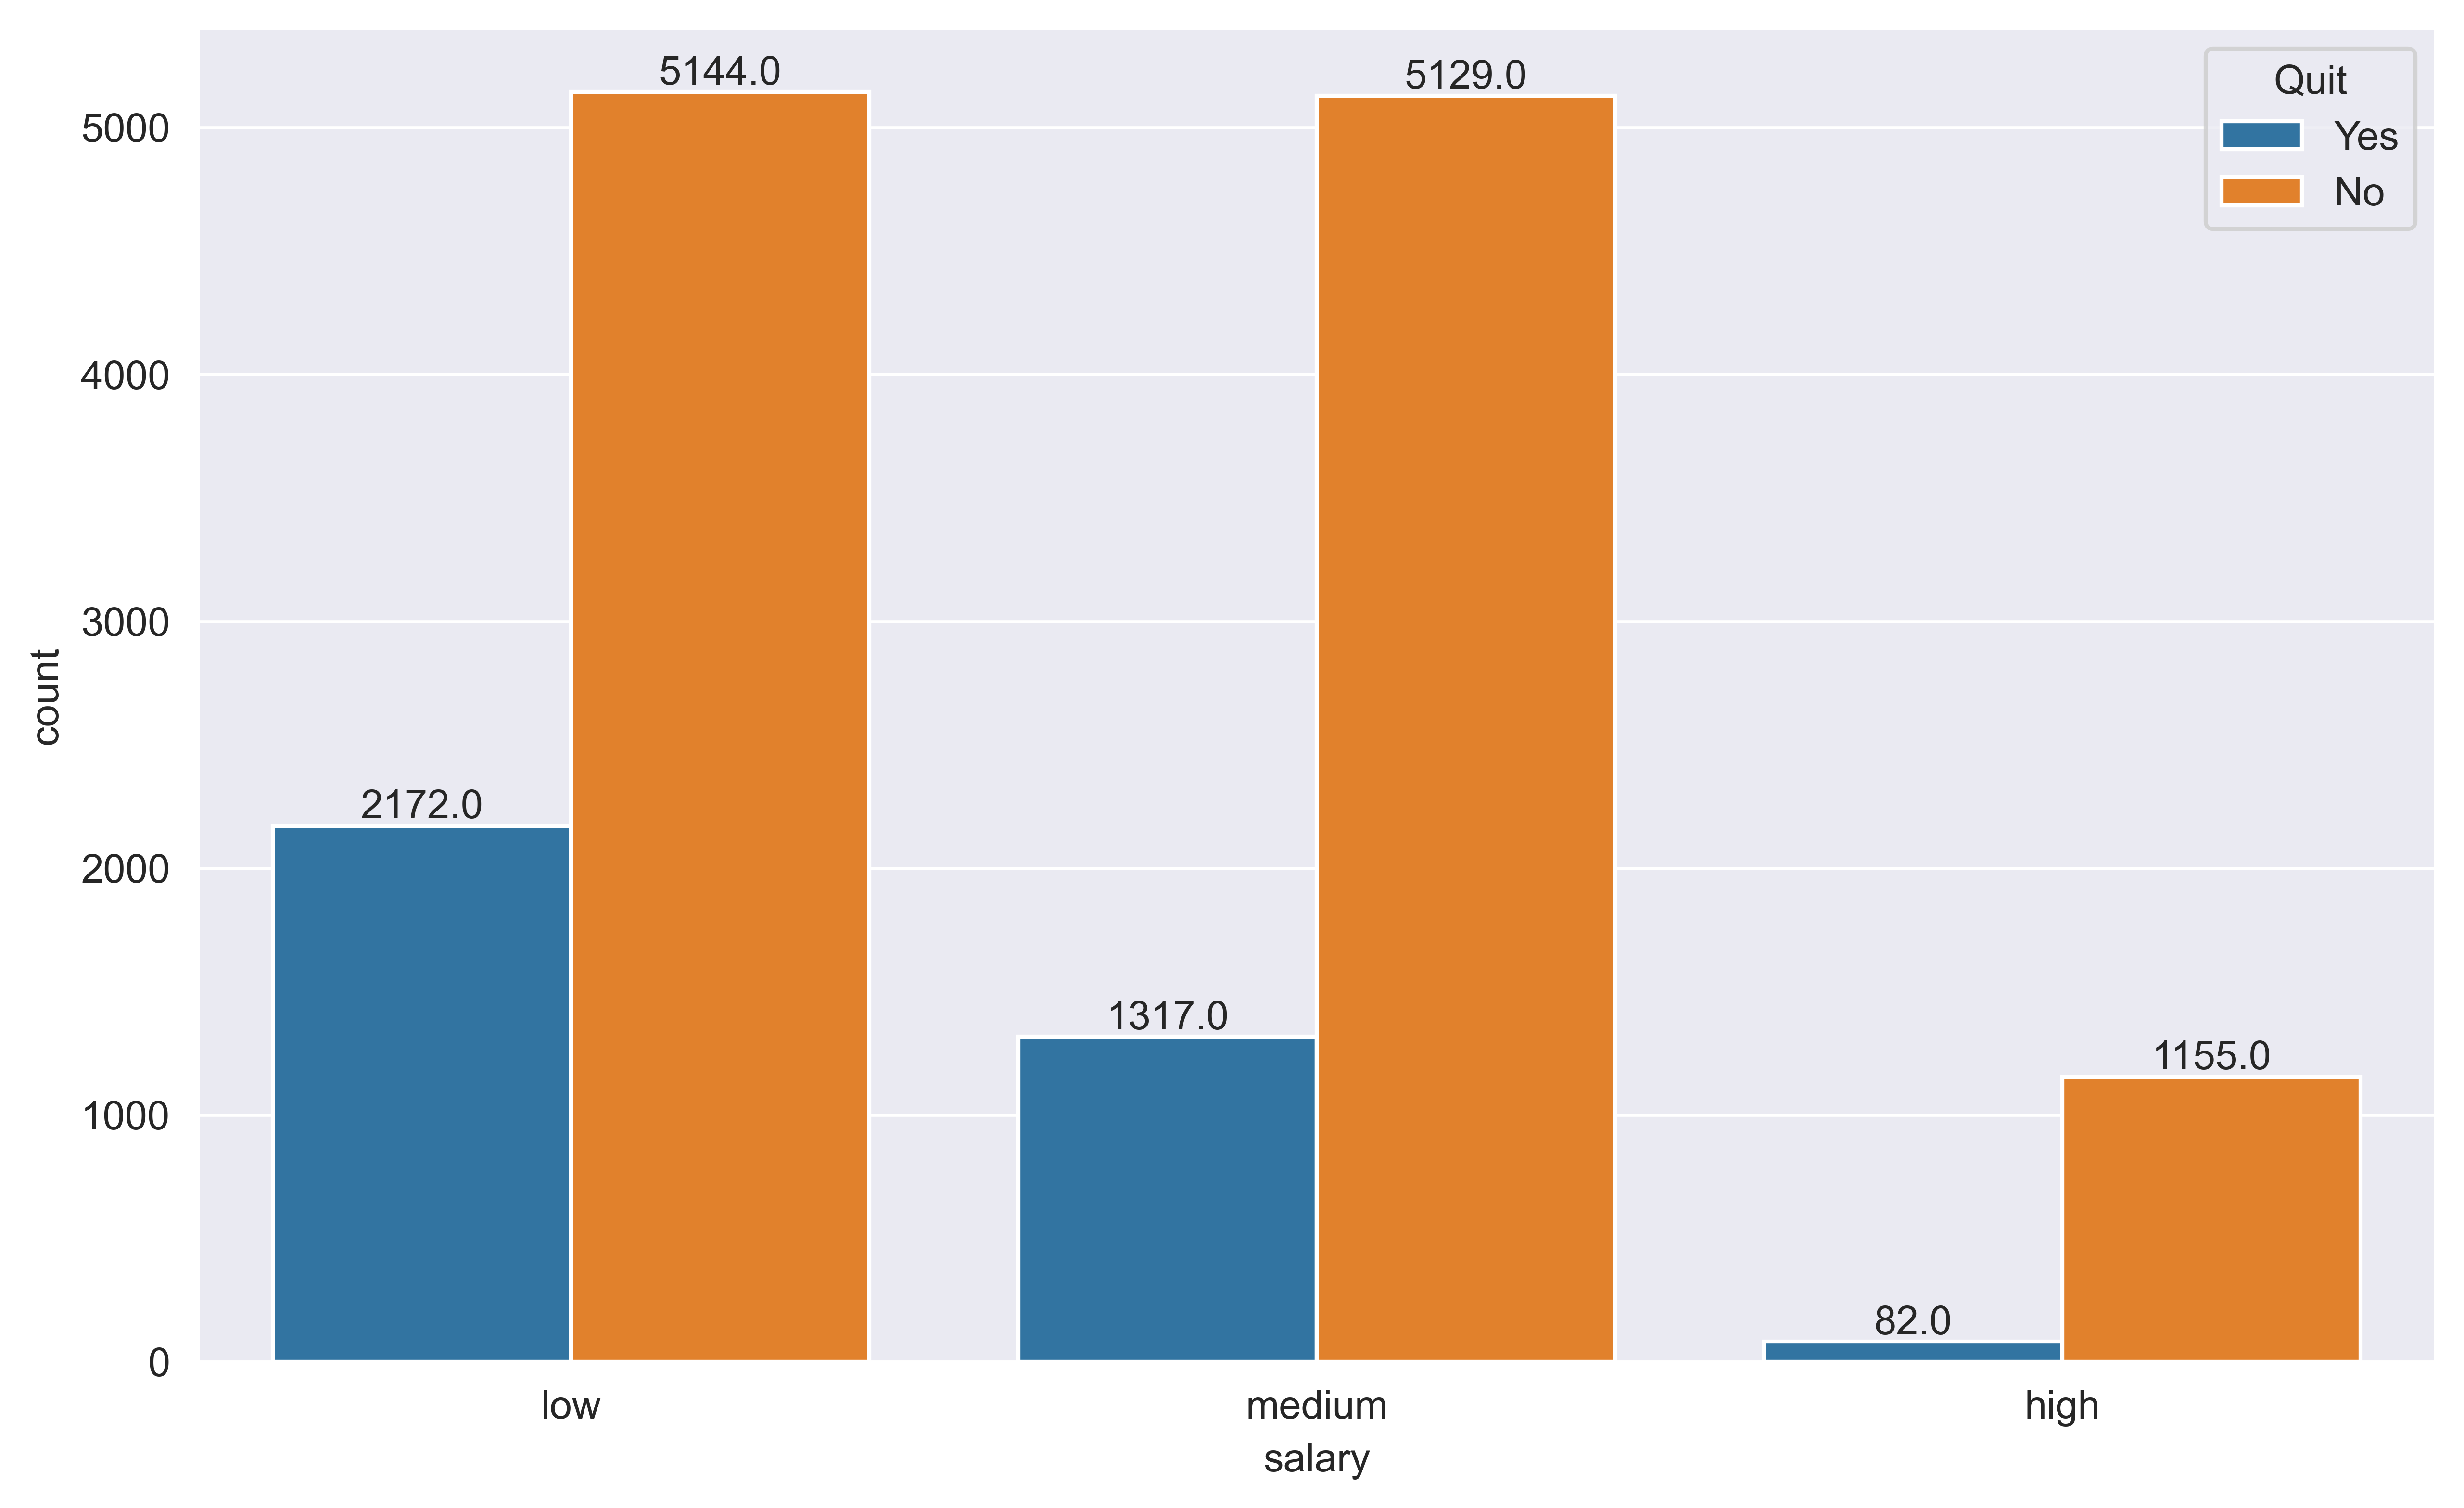

In [52]:
# checking the type of employee leaving
plt.figure(figsize=(10, 6), dpi=600)
ax = sns.countplot(x='salary', data=employee_df, hue='Quit')

# Adding annotations to the bars
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()


Based on the analysis of the employee data, it is evident that a significant number of employees who quit fall into the low salary category. Additionally, there is a considerable proportion of employees with high salaries who have also chosen to leave the organisation. In order to retain employees and reduce attrition, it is recommended to conduct a comprehensive salary review.
The salary review should focus on addressing the salary structure, ensuring competitive compensation for employees and providing appropriate incentives to retain high-performing individuals. By implementing these measures, the organisation can create a more attractive and rewarding work environment, potentially reducing the number of employees leaving due to salary-related concerns.

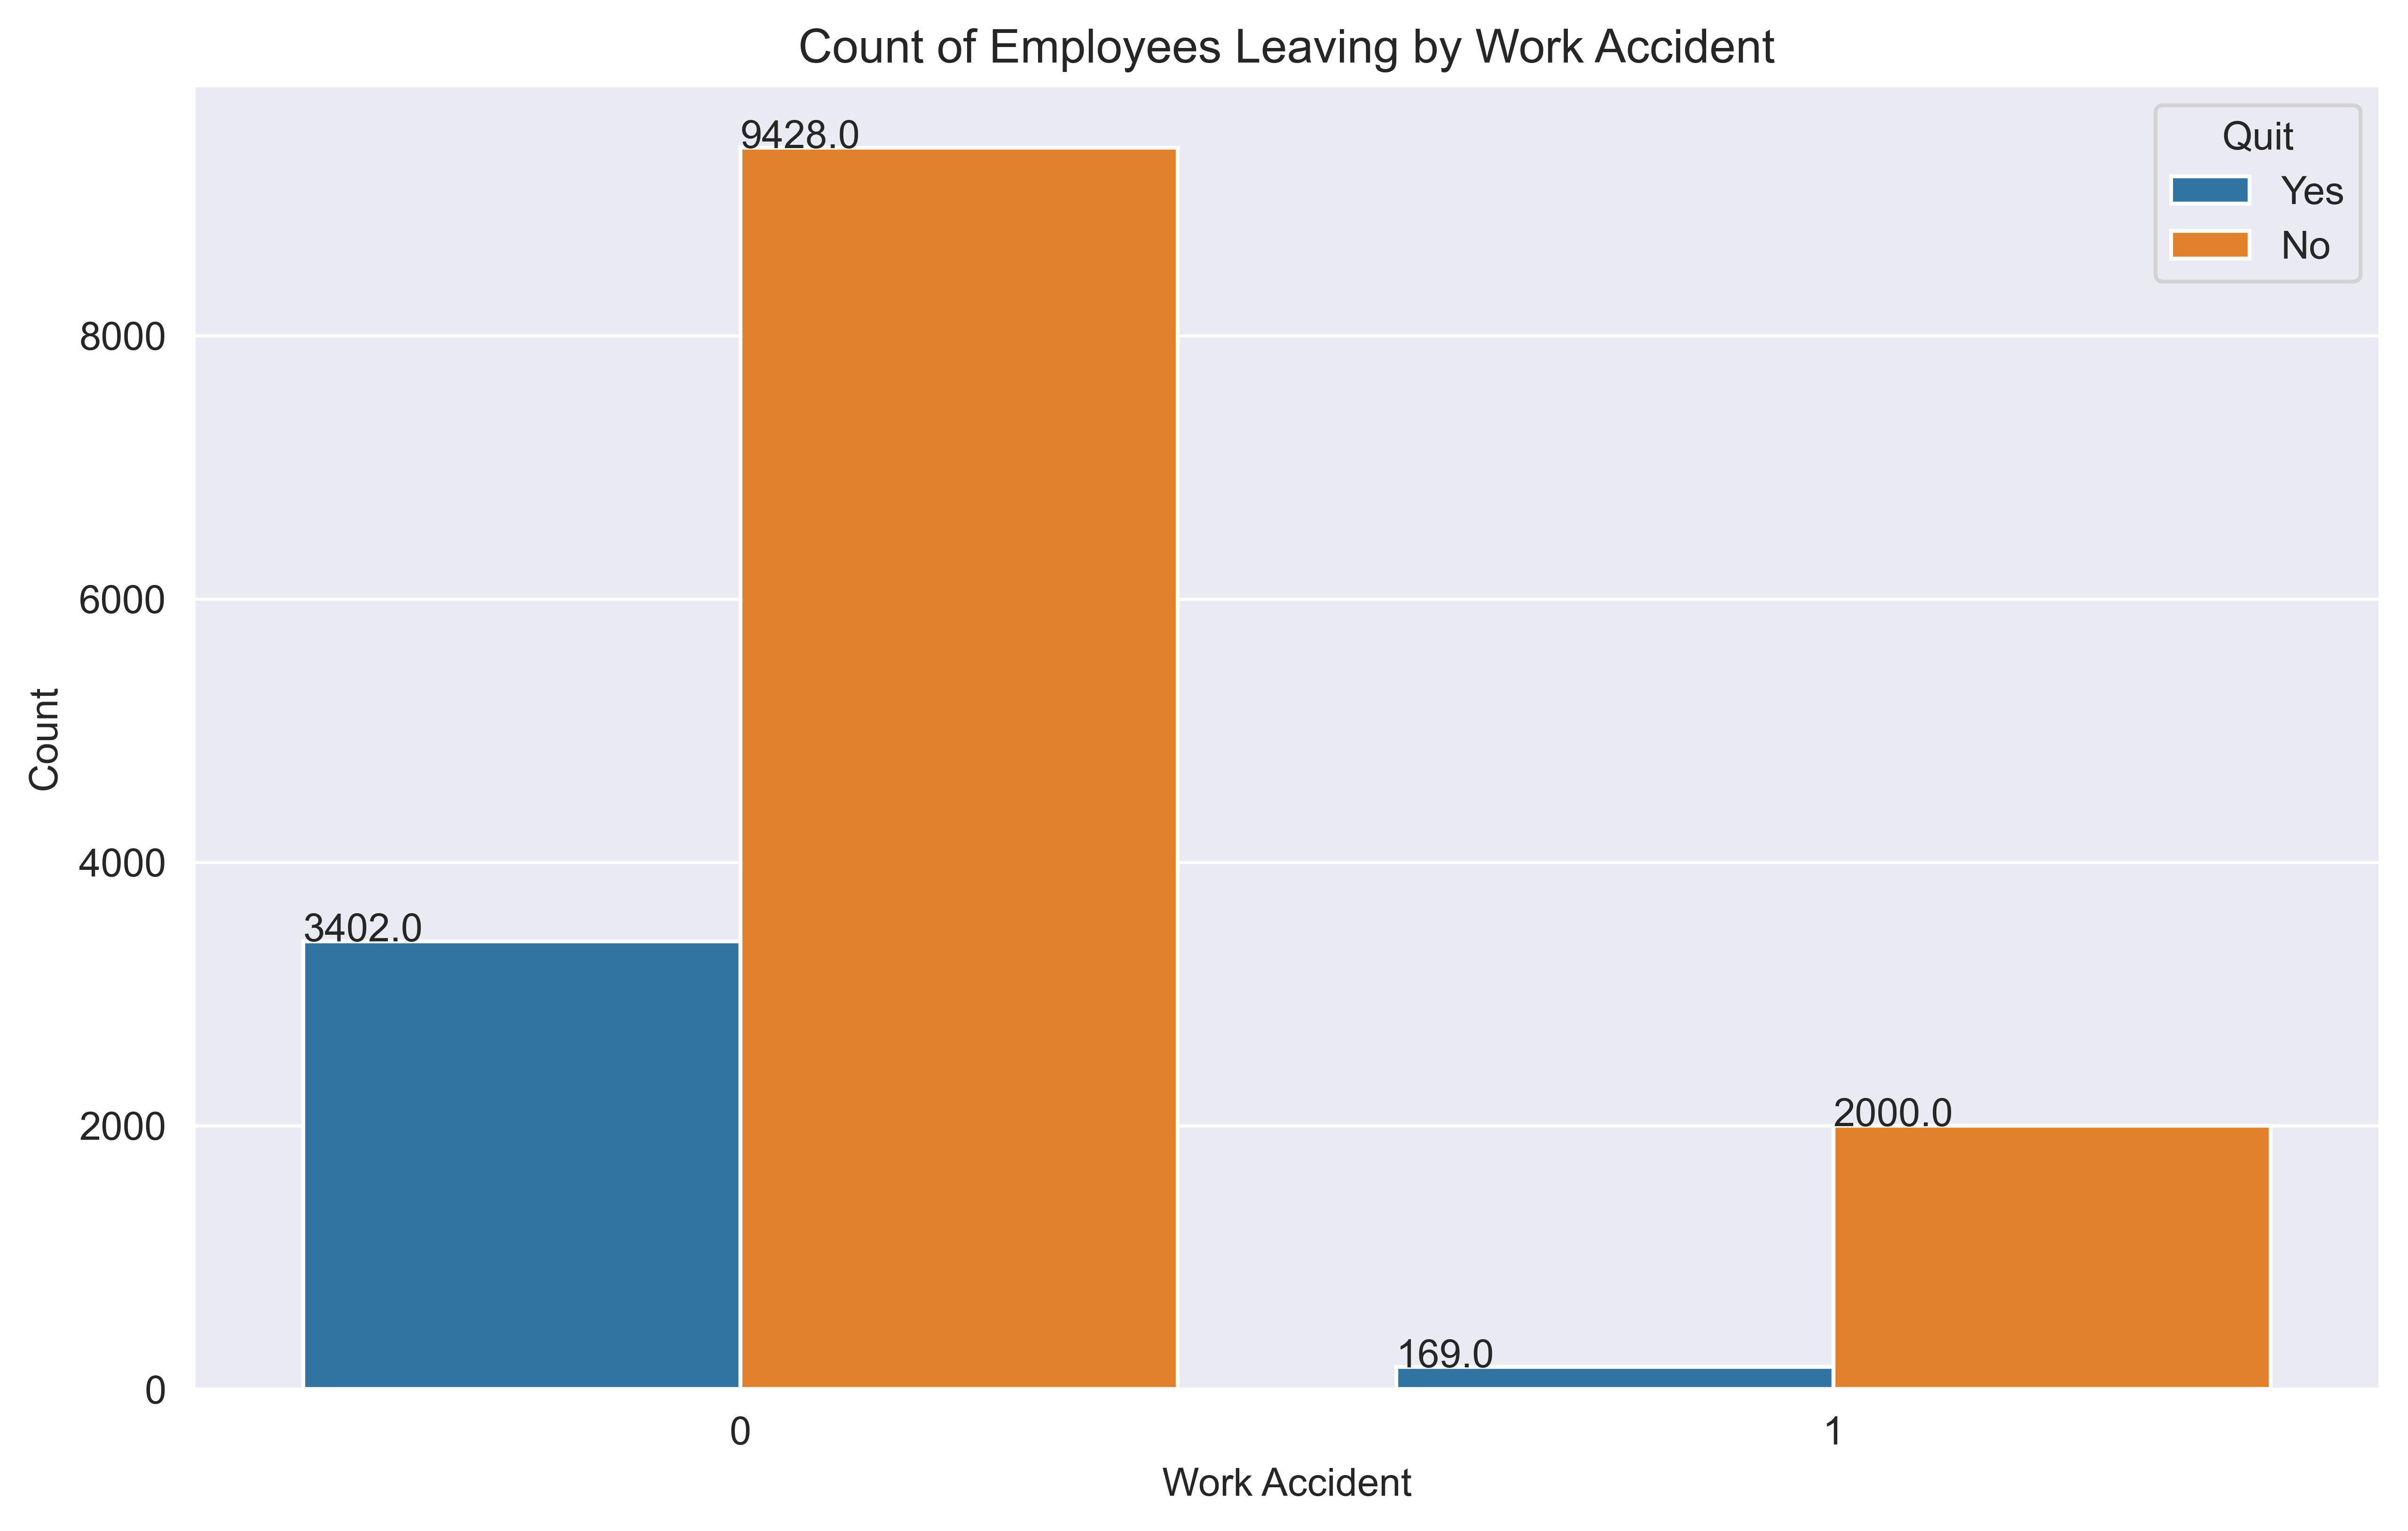

In [59]:
# checking the type of employee leaving
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6), dpi=600)
ax = sns.countplot(x='Work_accident', data=employee_df, hue='Quit')

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height() + 0.05))

plt.xlabel('Work Accident')
plt.ylabel('Count')
plt.title('Count of Employees Leaving by Work Accident')
plt.show()

The countplot figure indicates that work accidents may not be a decisive factor in employee attrition. The majority of employees who left the organisation did not experience any work accidents. This suggests that work accidents alone may not have a strong direct impact on employee decisions to quit. It is important to consider other factors such as job satisfaction, career growth opportunities, work-life balance, and organisational culture when analysing employee attrition. These factors could have a more significant influence on employees' decisions to leave the organisation. Therefore, a comprehensive evaluation of multiple factors is necessary to understand the drivers of employee attrition effectively.

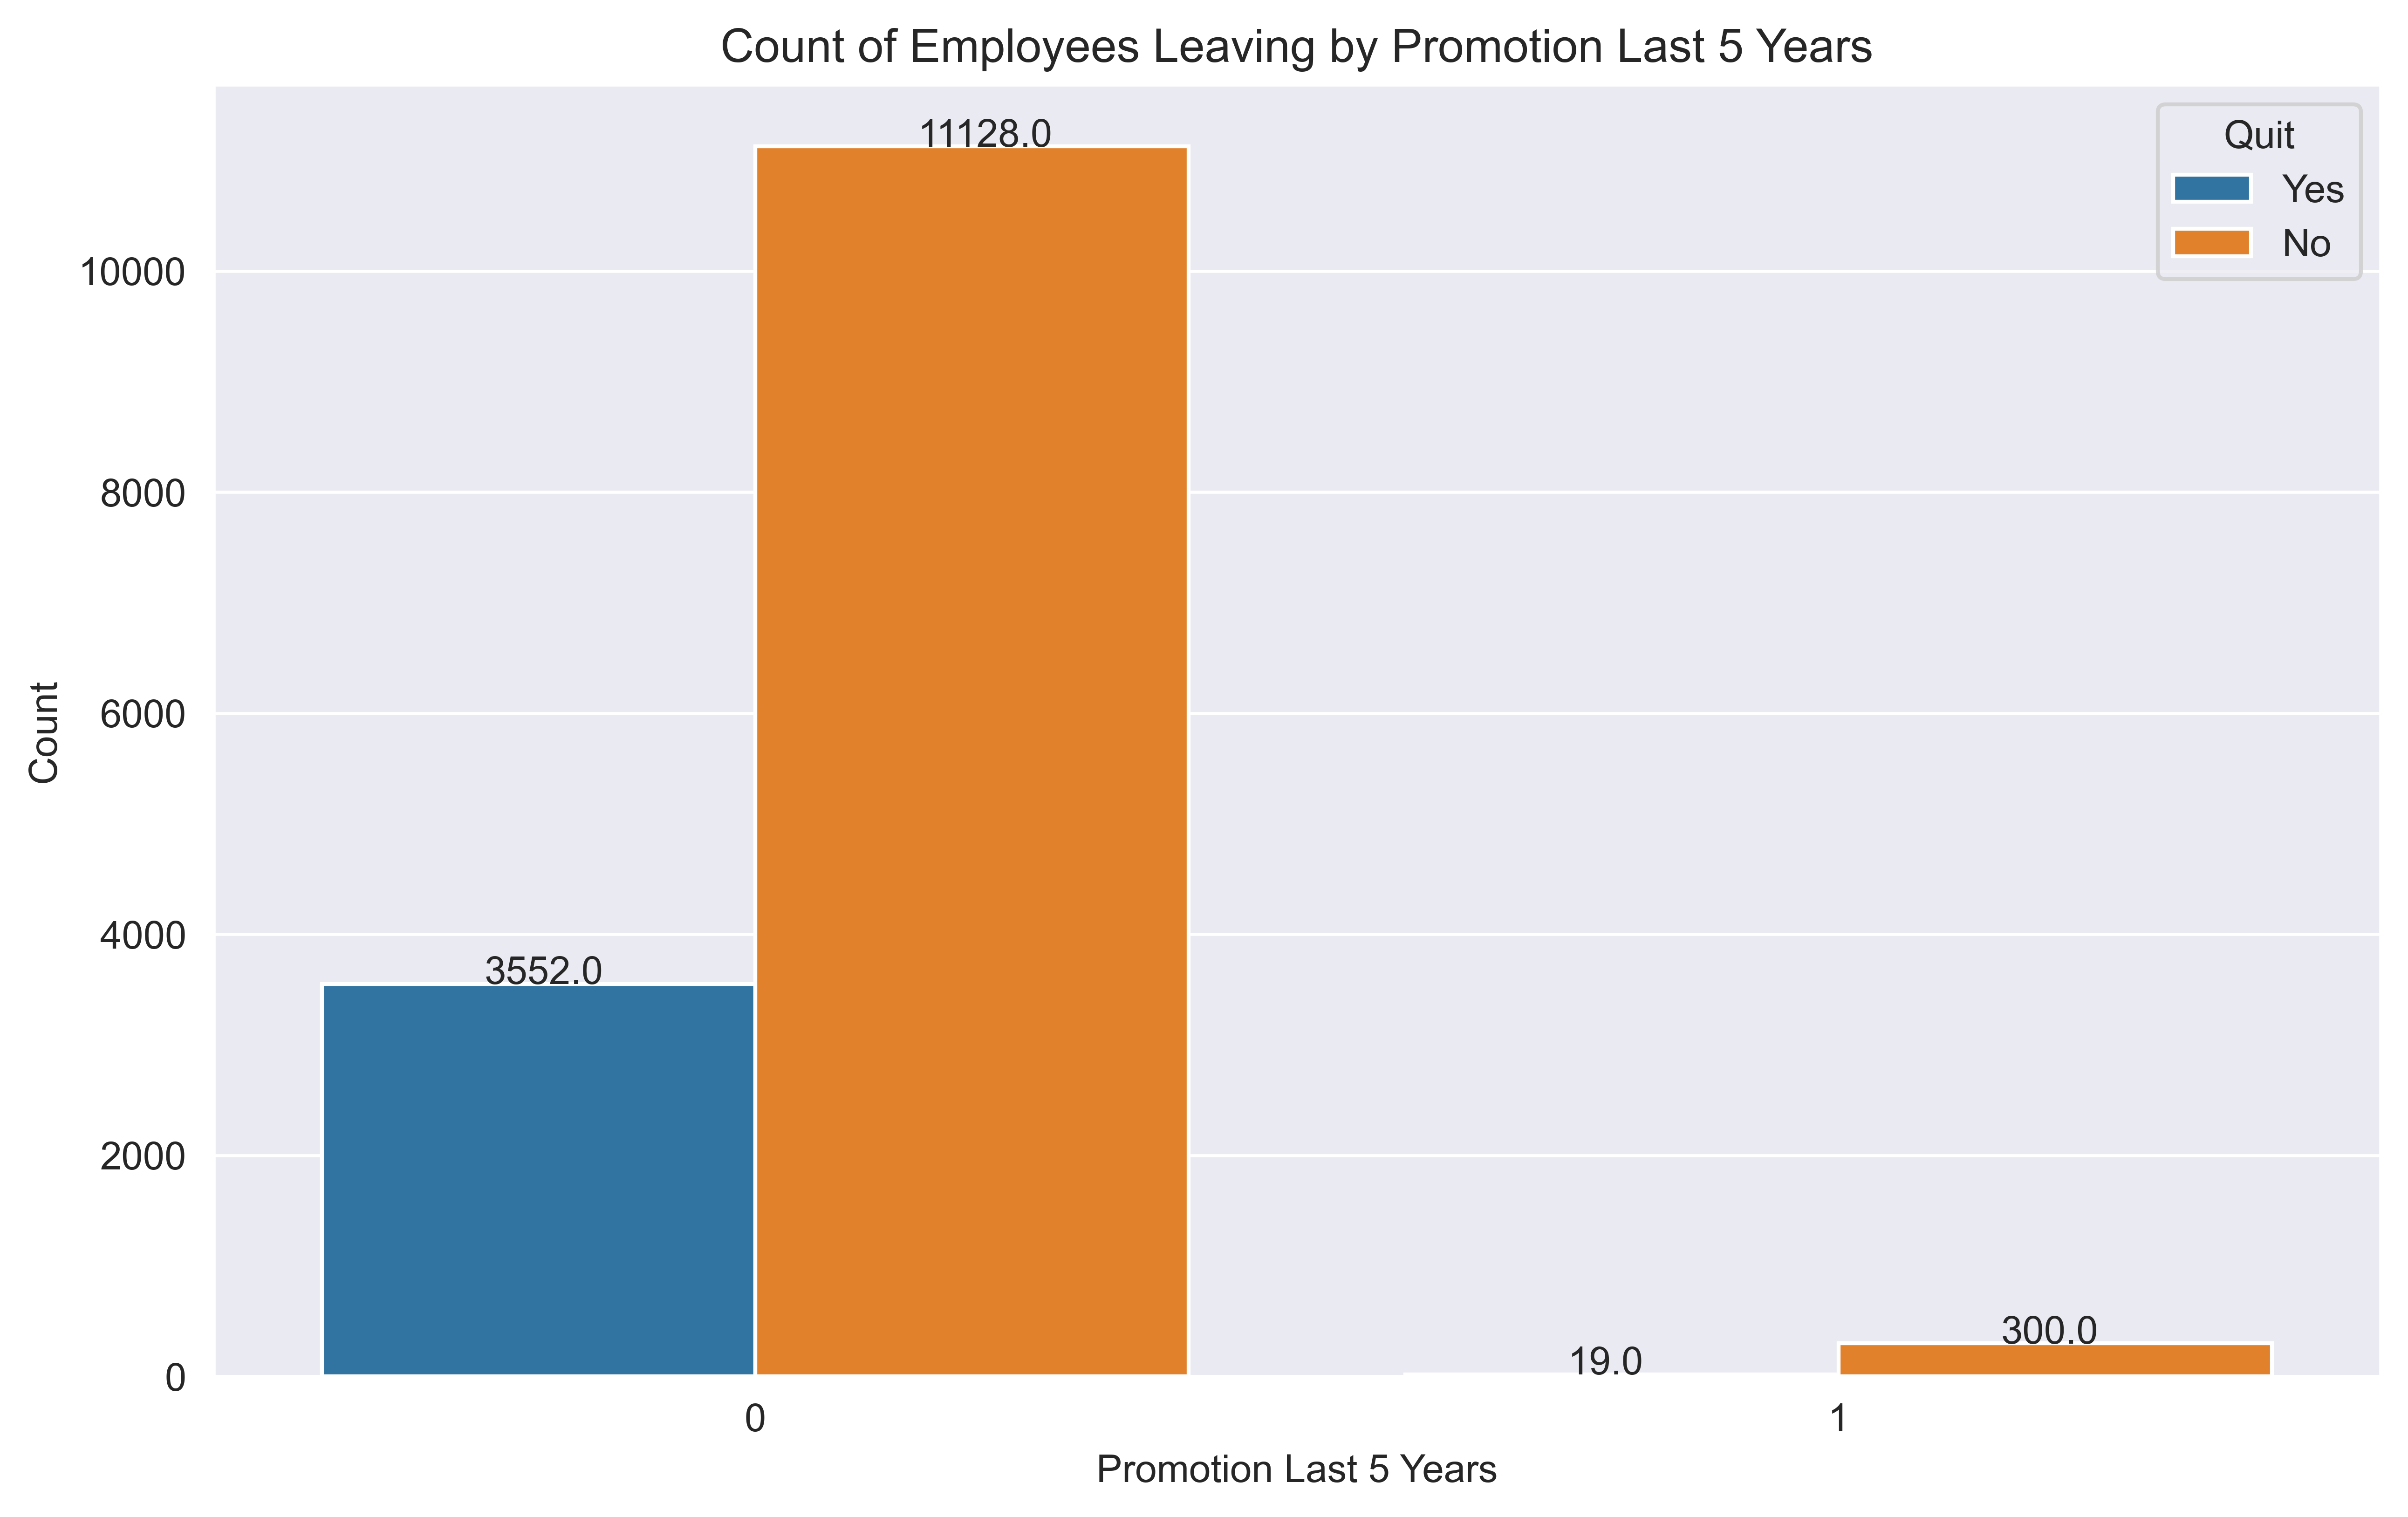

In [60]:
# checking the type of employee leaving
plt.figure(figsize=(10, 6), dpi=600)
ax = sns.countplot(x='promotion_last_5years', data=employee_df, hue='Quit')

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.15, p.get_height() + 0.05))

plt.xlabel('Promotion Last 5 Years')
plt.ylabel('Count')
plt.title('Count of Employees Leaving by Promotion Last 5 Years')
plt.show()

The countplot figure highlights a noteworthy trend where a significant number of employees who have not received any promotions in the last 5 years are leaving the organisation. This observation strongly suggests that the lack of promotional opportunities is likely contributing to employee attrition. To address this issue and improve employee retention, it is highly recommended that the organisation initiate a comprehensive promotion exercise. By providing growth opportunities and recognising the contributions of employees through promotions, the organisation can create a more engaging and rewarding work environment. This proactive approach to career development can help motivate employees, enhance job satisfaction and ultimately reduce attrition rates.

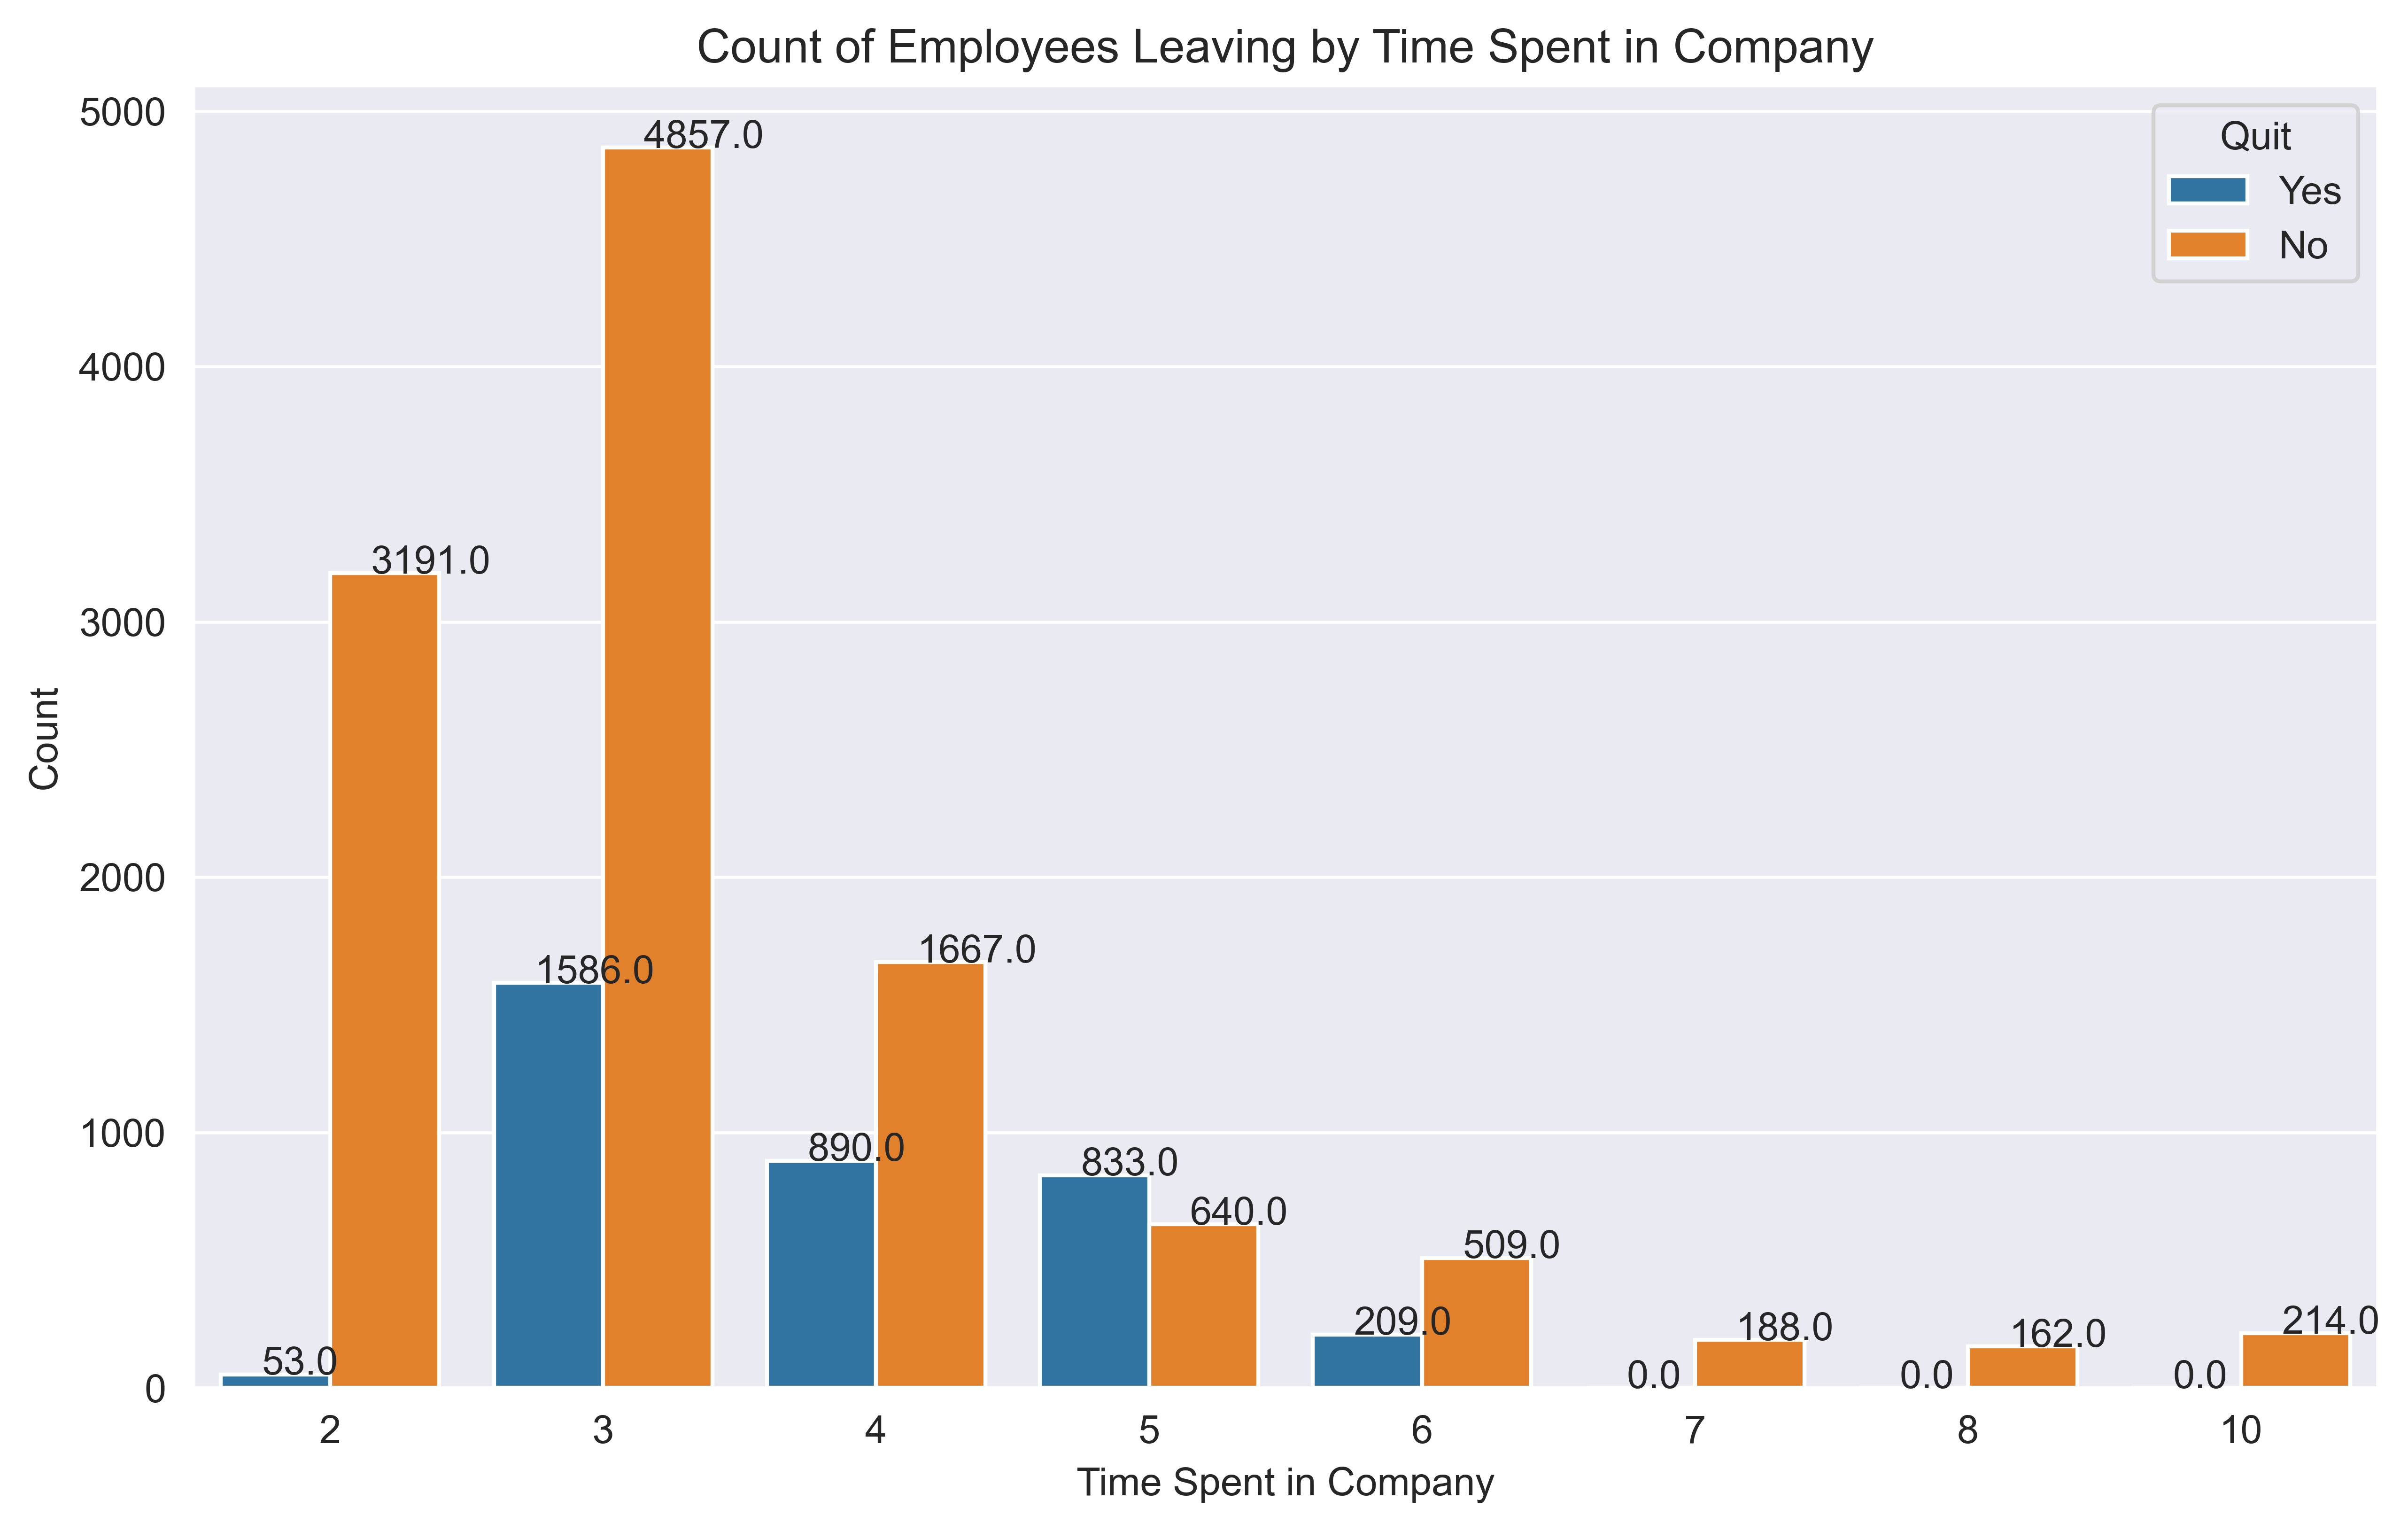

In [61]:
# checking the type of employee leaving
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6), dpi=600)
ax = sns.countplot(x='time_spend_company', data=employee_df, hue='Quit')

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.15, p.get_height() + 0.05))

plt.xlabel('Time Spent in Company')
plt.ylabel('Count')
plt.title('Count of Employees Leaving by Time Spent in Company')
plt.show()

The countplot figure reveals a noteworthy trend indicating that employees who have been with the organisation for approximately 2 to 3 years are more prone to quitting. This observation suggests the existence of specific factors or challenges that may be influencing employee attrition during this particular tenure range. In order to improve employee retention, it is crucial for the organisation to delve deeper and investigate the underlying reasons behind this pattern. By understanding the unique circumstances faced by employees in the 2-3 year range, the organisation can develop targeted strategies and initiatives to address these challenges and create a more supportive and engaging work environment. Proactively addressing the concerns of employees during this critical period can greatly contribute to enhancing retention rates and fostering long-term commitment to the organisation.

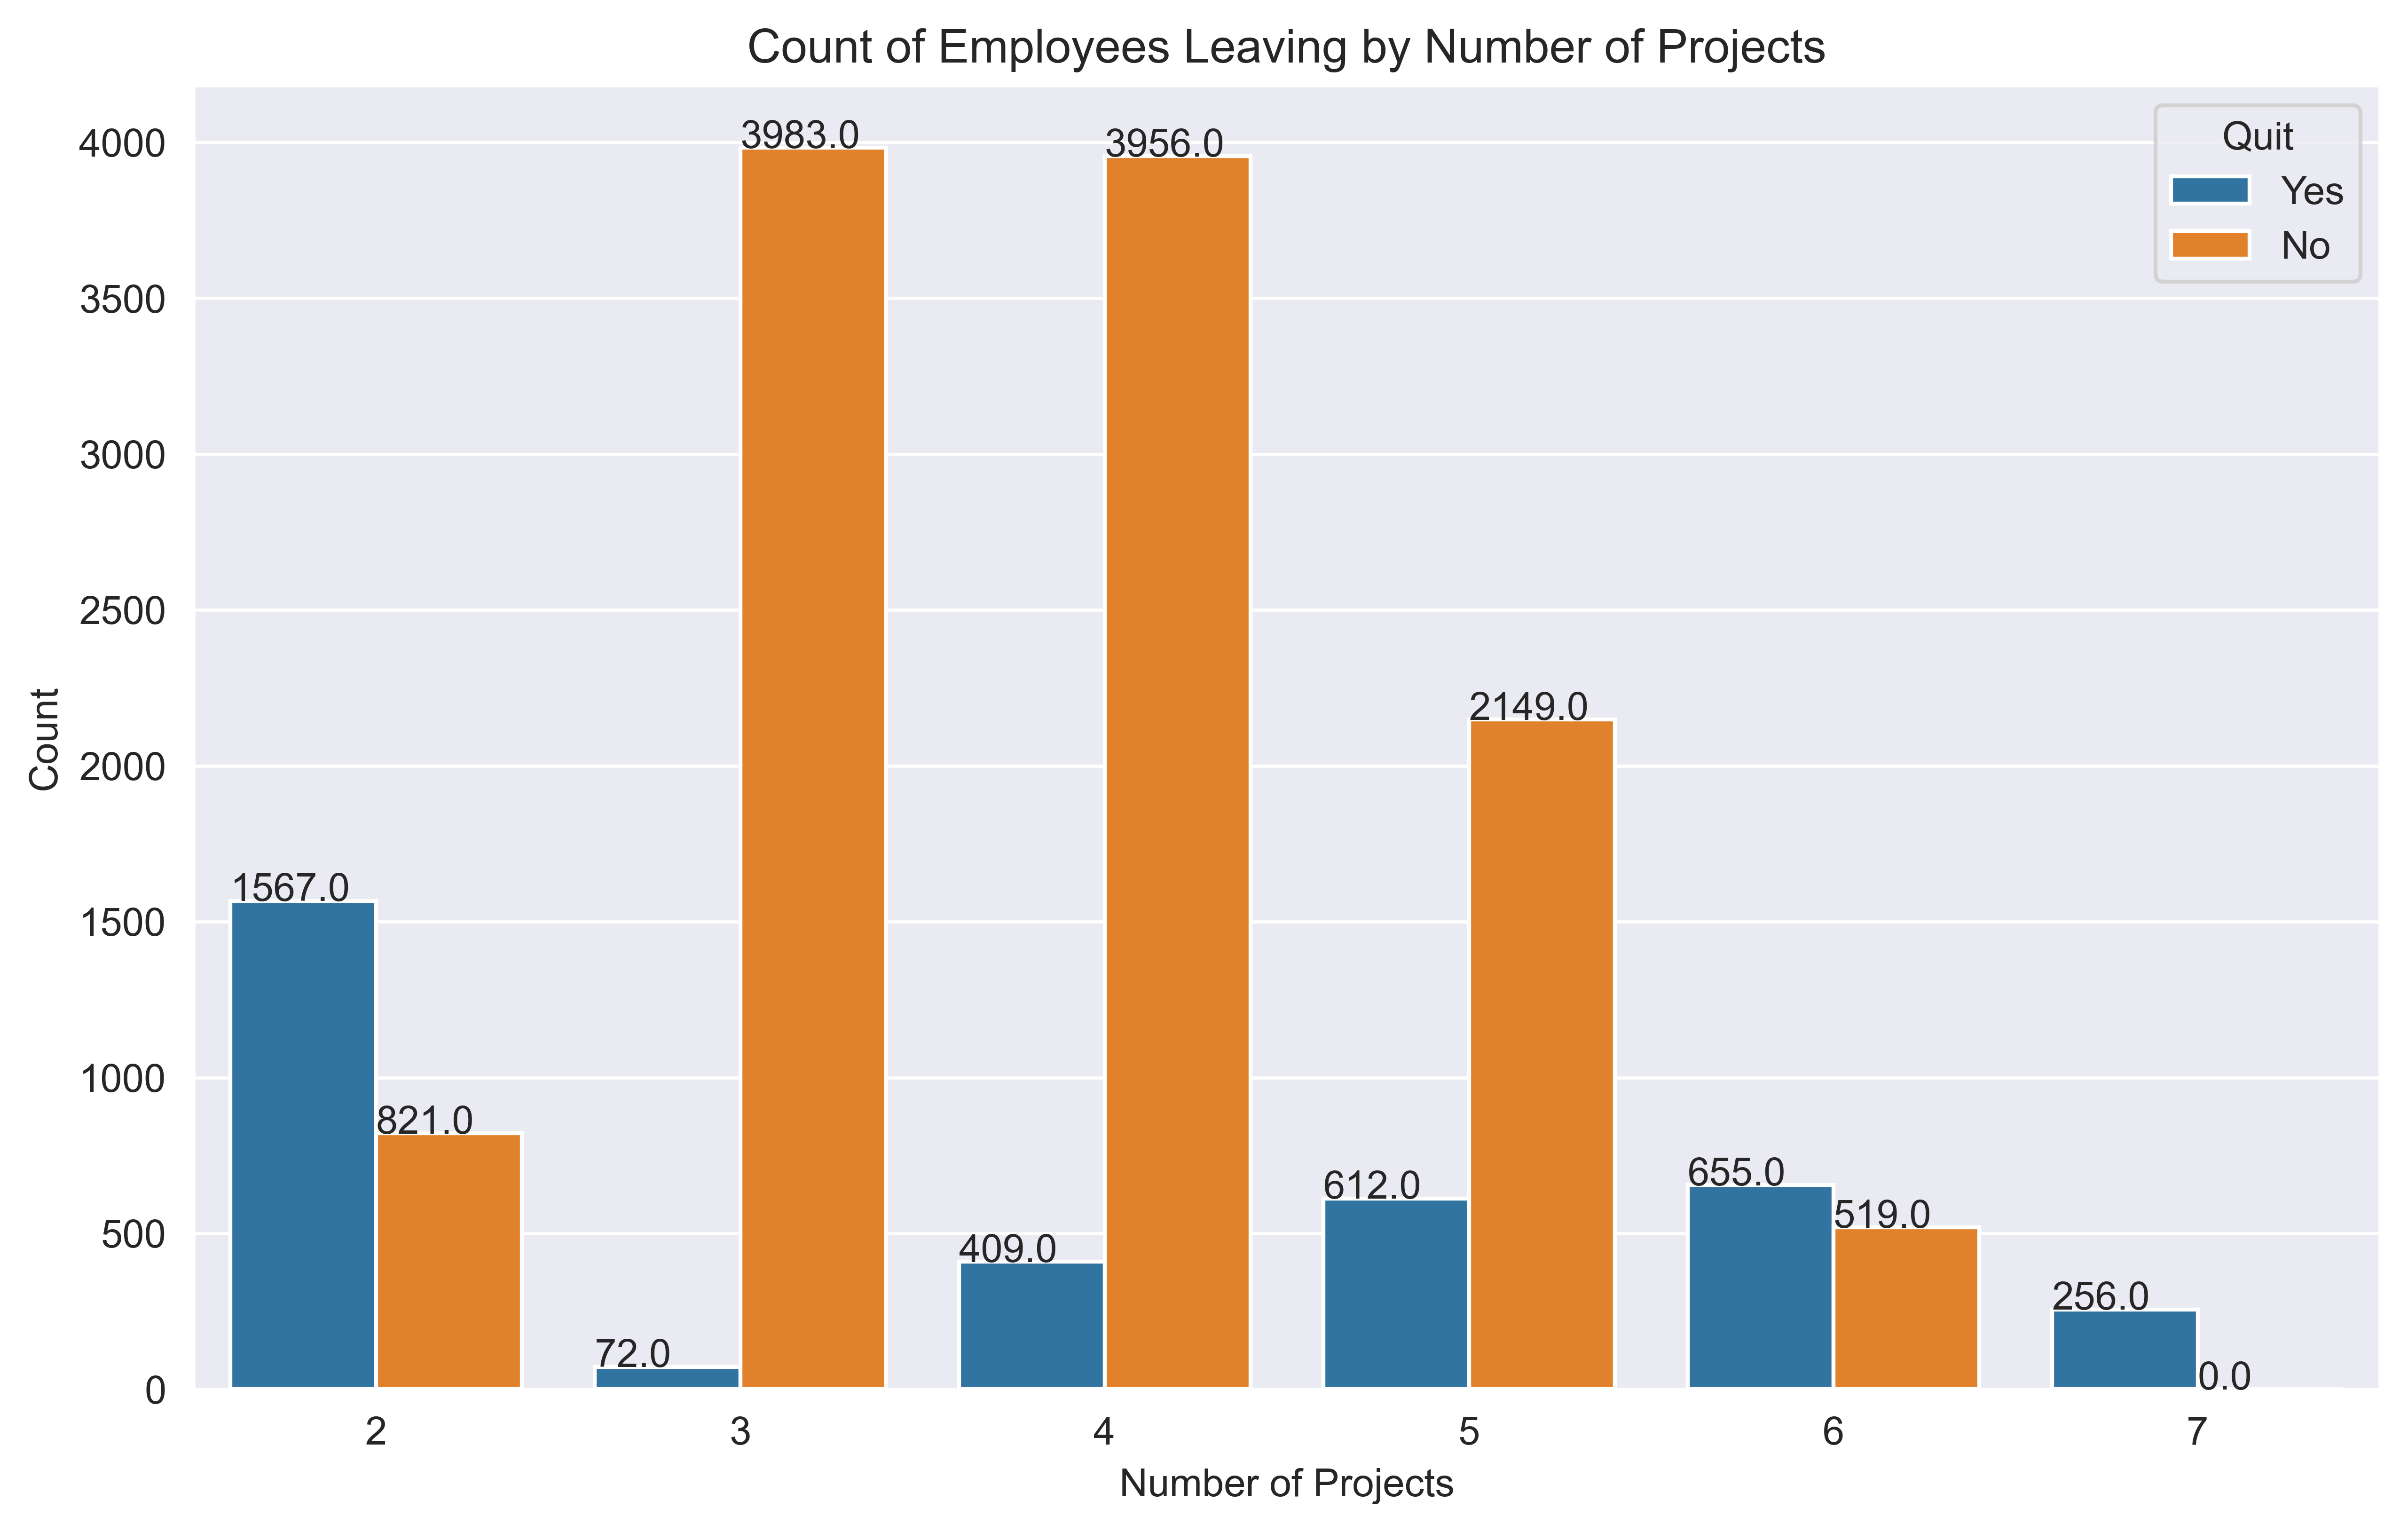

In [62]:
# checking the type of employee leaving
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6), dpi=600)
ax = sns.countplot(x='number_project', data=employee_df, hue='Quit')

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0, p.get_height() + 0.05))

plt.xlabel('Number of Projects')
plt.ylabel('Count')
plt.title('Count of Employees Leaving by Number of Projects')
plt.show()

The countplot figure provides insights into the relationship between the number of projects an employee has worked on and their likelihood of quitting. It shows that employees who have worked on at least 3 or 4 projects are more prone to quitting, with those who have exactly 2 projects showing the highest quitting rate. This observation suggests that employees may be more inclined to leave the organisation after gaining a considerable amount of experience by working on multiple projects. It is possible that once employees have acquired a certain level of expertise and exposure to various projects, they may be seeking new challenges or opportunities for growth outside the current organisation. To address this trend and improve employee retention, it is important for the organisation to provide ongoing opportunities for professional development and career advancement. Implementing strategies such as job rotation, cross-functional projects and mentoring programs can help employees feel engaged and motivated to stay with the organisation, even after gaining substantial project experience. Additionally, conducting exit interviews and gathering feedback from employees who have quit can provide valuable insights into the specific reasons behind their decisions, allowing the organisation to make targeted improvements to mitigate employee attrition.

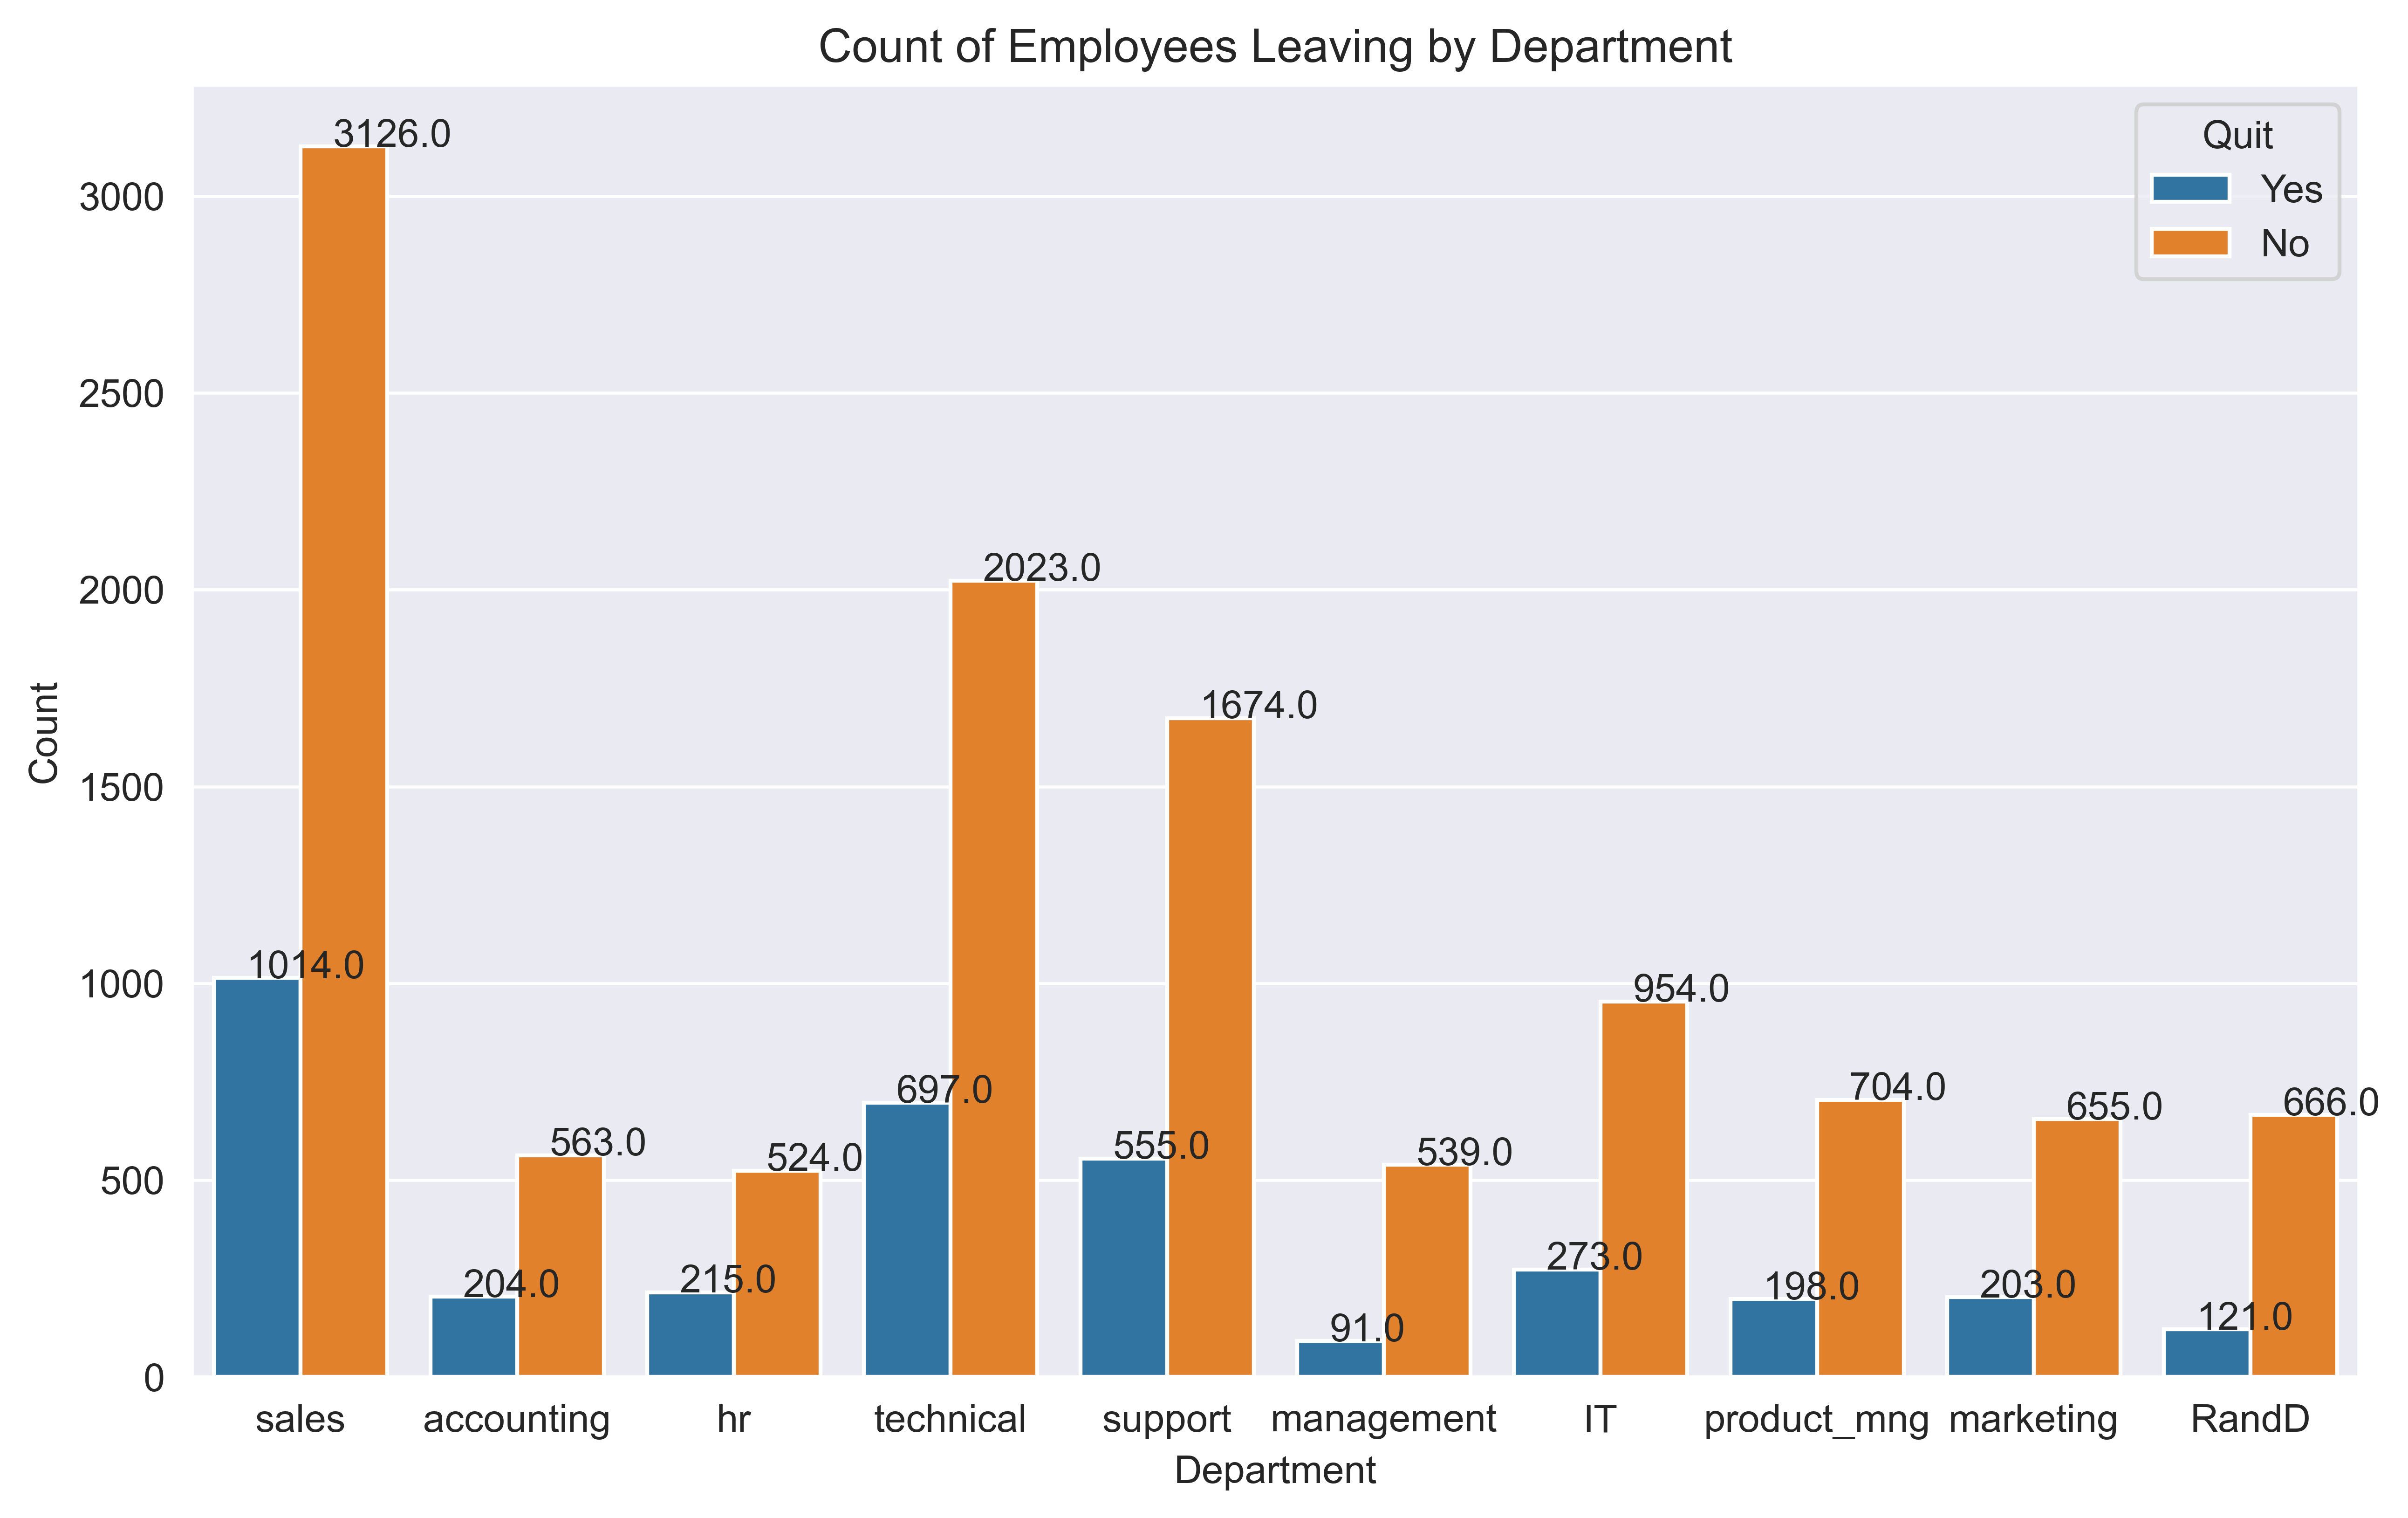

In [63]:
# checking the type of employee leaving
plt.figure(figsize=(10, 6), dpi=600)
ax = sns.countplot(x='dept', data=employee_df, hue='Quit')

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x() + 0.15, p.get_height() + 0.05))

plt.xlabel('Department')
plt.ylabel('Count')
plt.title('Count of Employees Leaving by Department')
plt.show()


Based on the countplot figure, it can be observed that employees are quitting from various departments within the organisation. The plot shows the number of employees leaving in each department relative to the number of employees present in that department. This information provides insights into the attrition rates across different departments and can help identify areas of concern. It is important for the organization to further analyse the reasons behind the higher attrition rates in specific departments and take appropriate measures to improve employee retention and satisfaction.

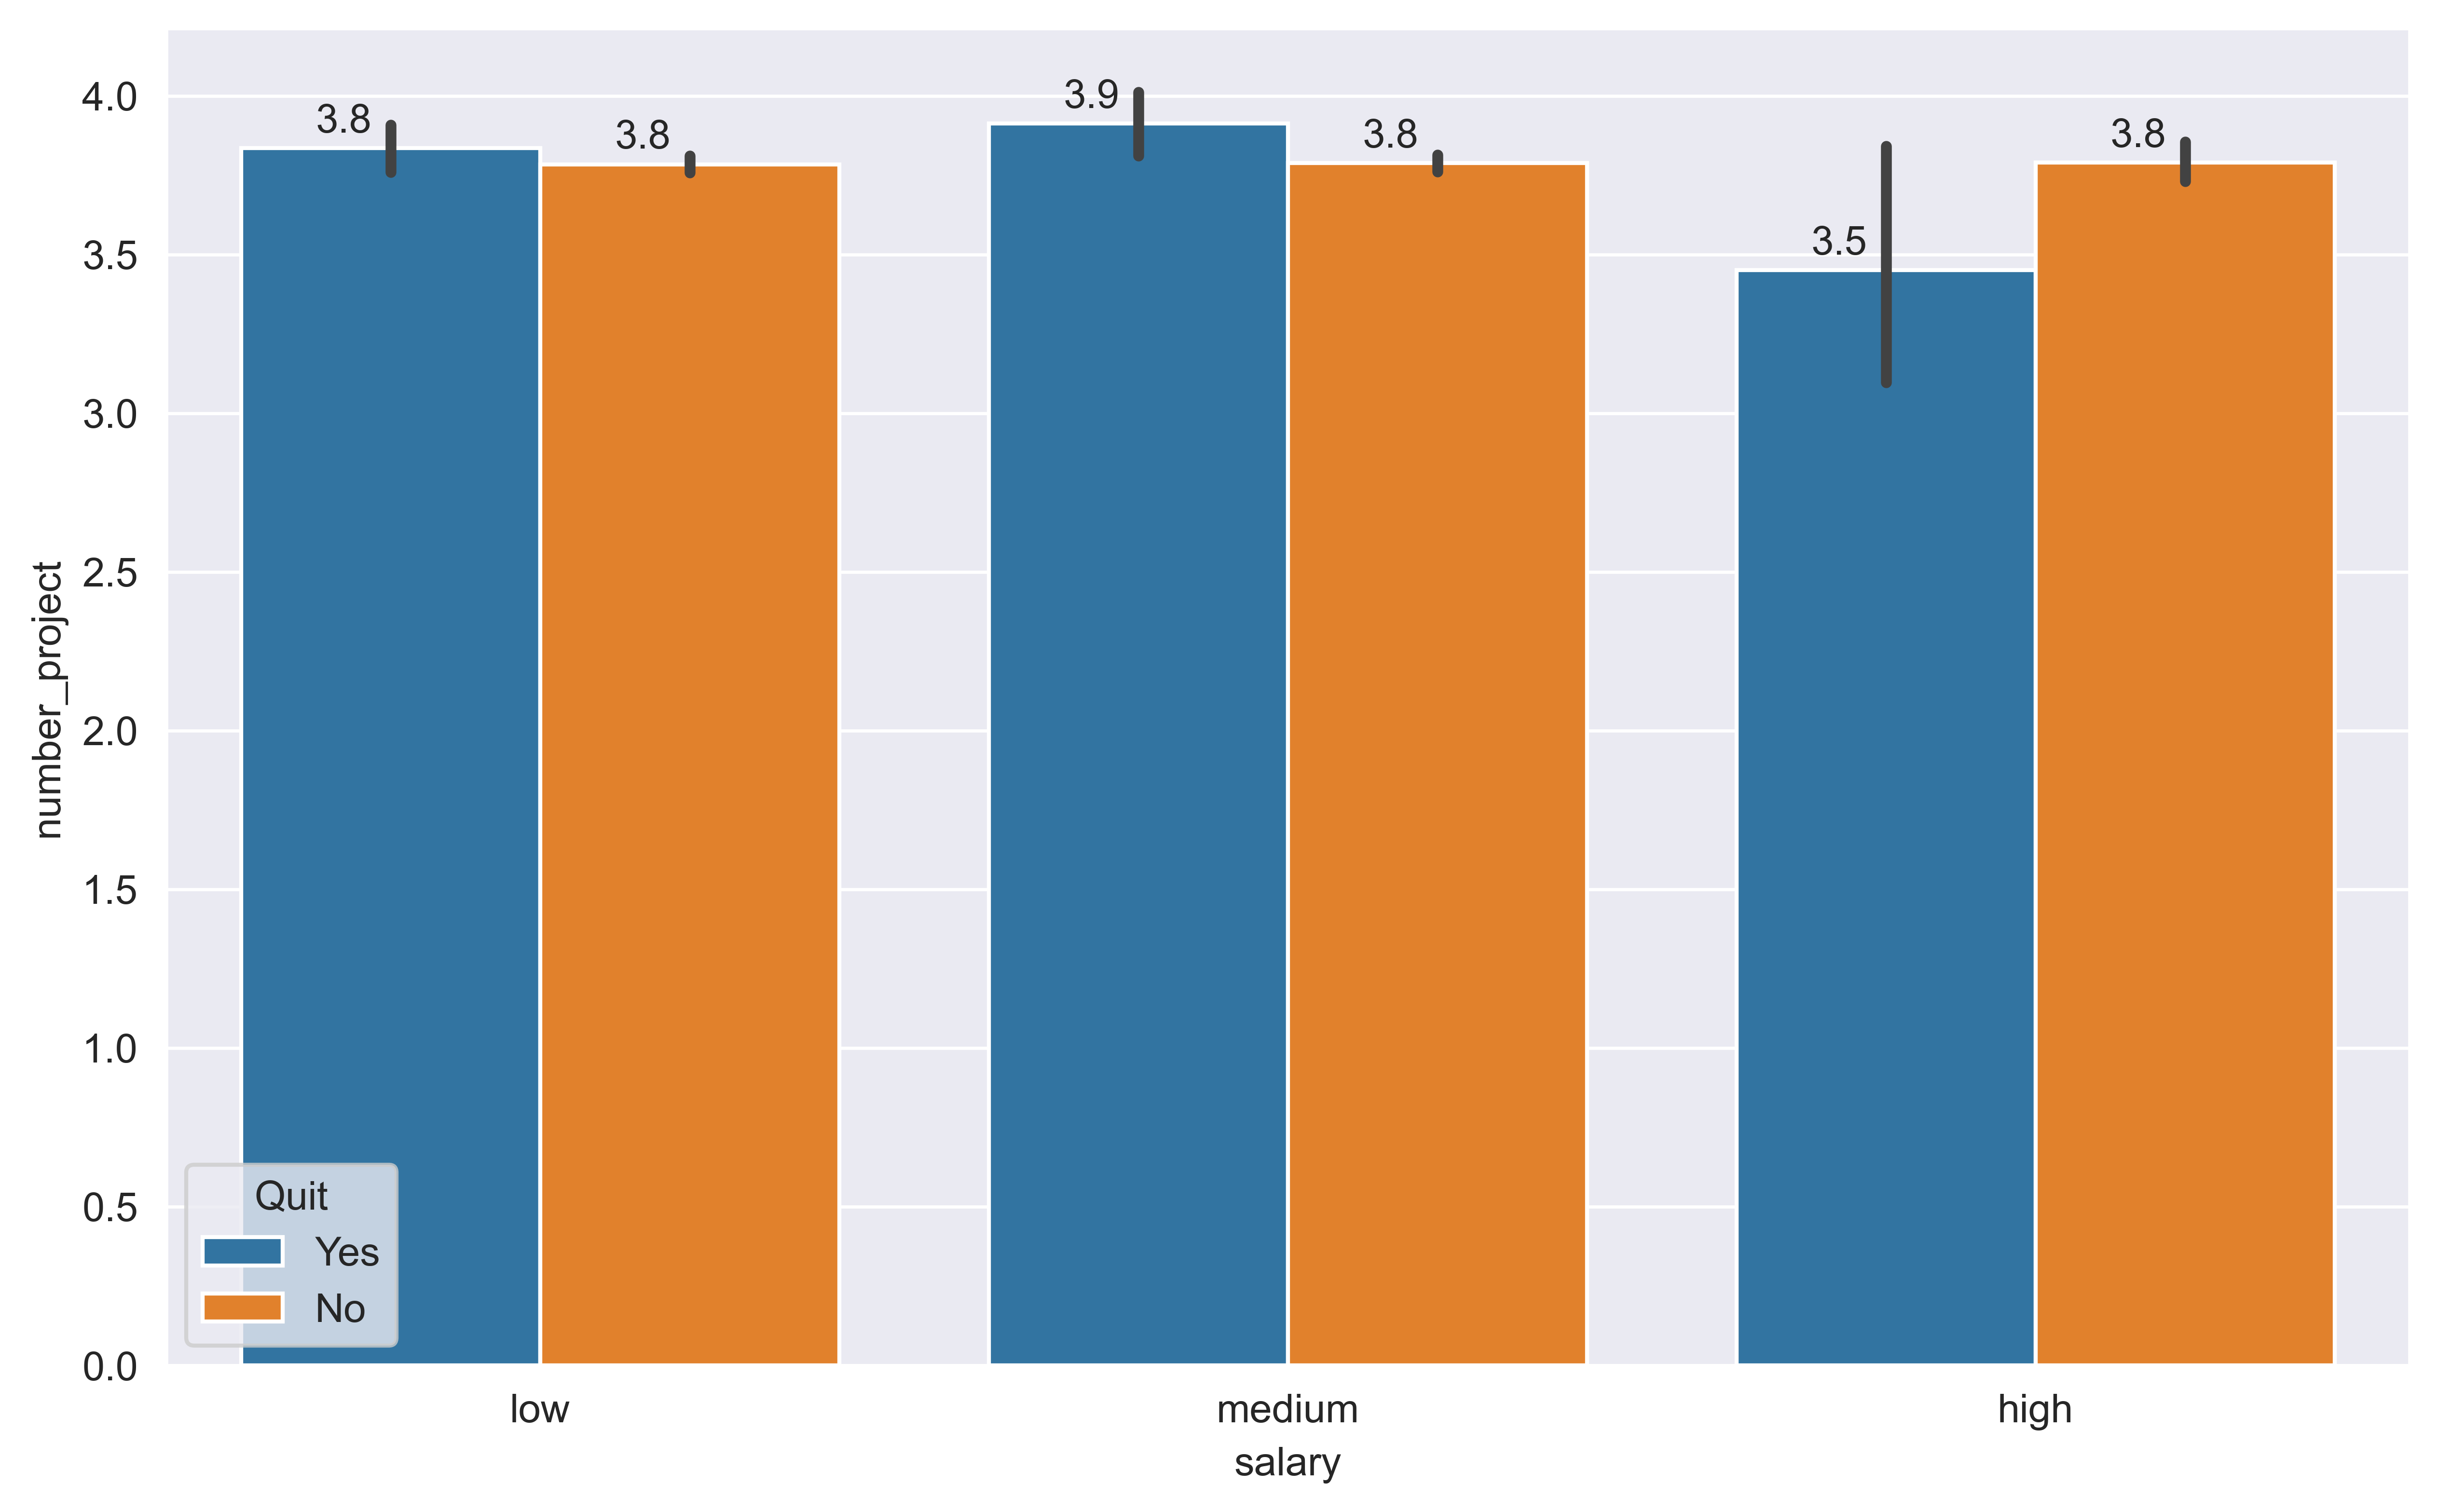

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6), dpi=600)
ax = sns.barplot(x='salary', y='number_project', data=employee_df, hue='Quit')

for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.05))

plt.show()

The figure above illustrates the relationship between salary and the number of projects for employees, considering whether they quit or not. The barplot displays the average number of projects for each salary category, with the bars coloured by employee attrition status. The height of each bar represents the average number of projects and the numbers on top of the bars indicate the exact values. This visualisation helps in understanding if there is any correlation between salary level, project involvement and employee attrition.

<Figure size 6000x3600 with 0 Axes>

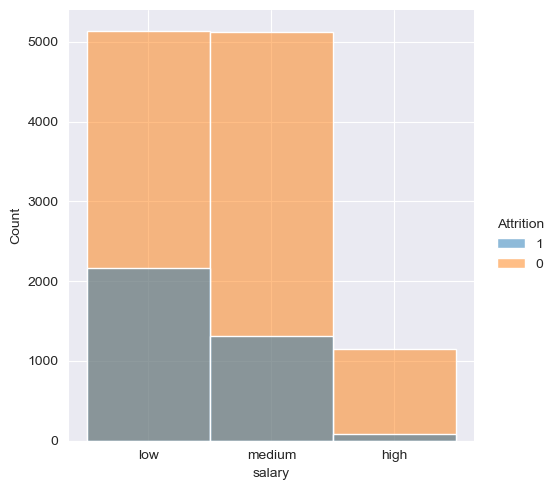

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6), dpi=600)  # Set the size and resolution of the figure
sns.displot(x='salary', data=employee_df, hue='Attrition')  # Create the histogram with hue for attrition


The figure shows the distribution of salaries among employees in the dataset, with a focus on attrition status. It helps us understand if there are any patterns between salary and attrition within the organisation.

<Figure size 6000x3600 with 0 Axes>

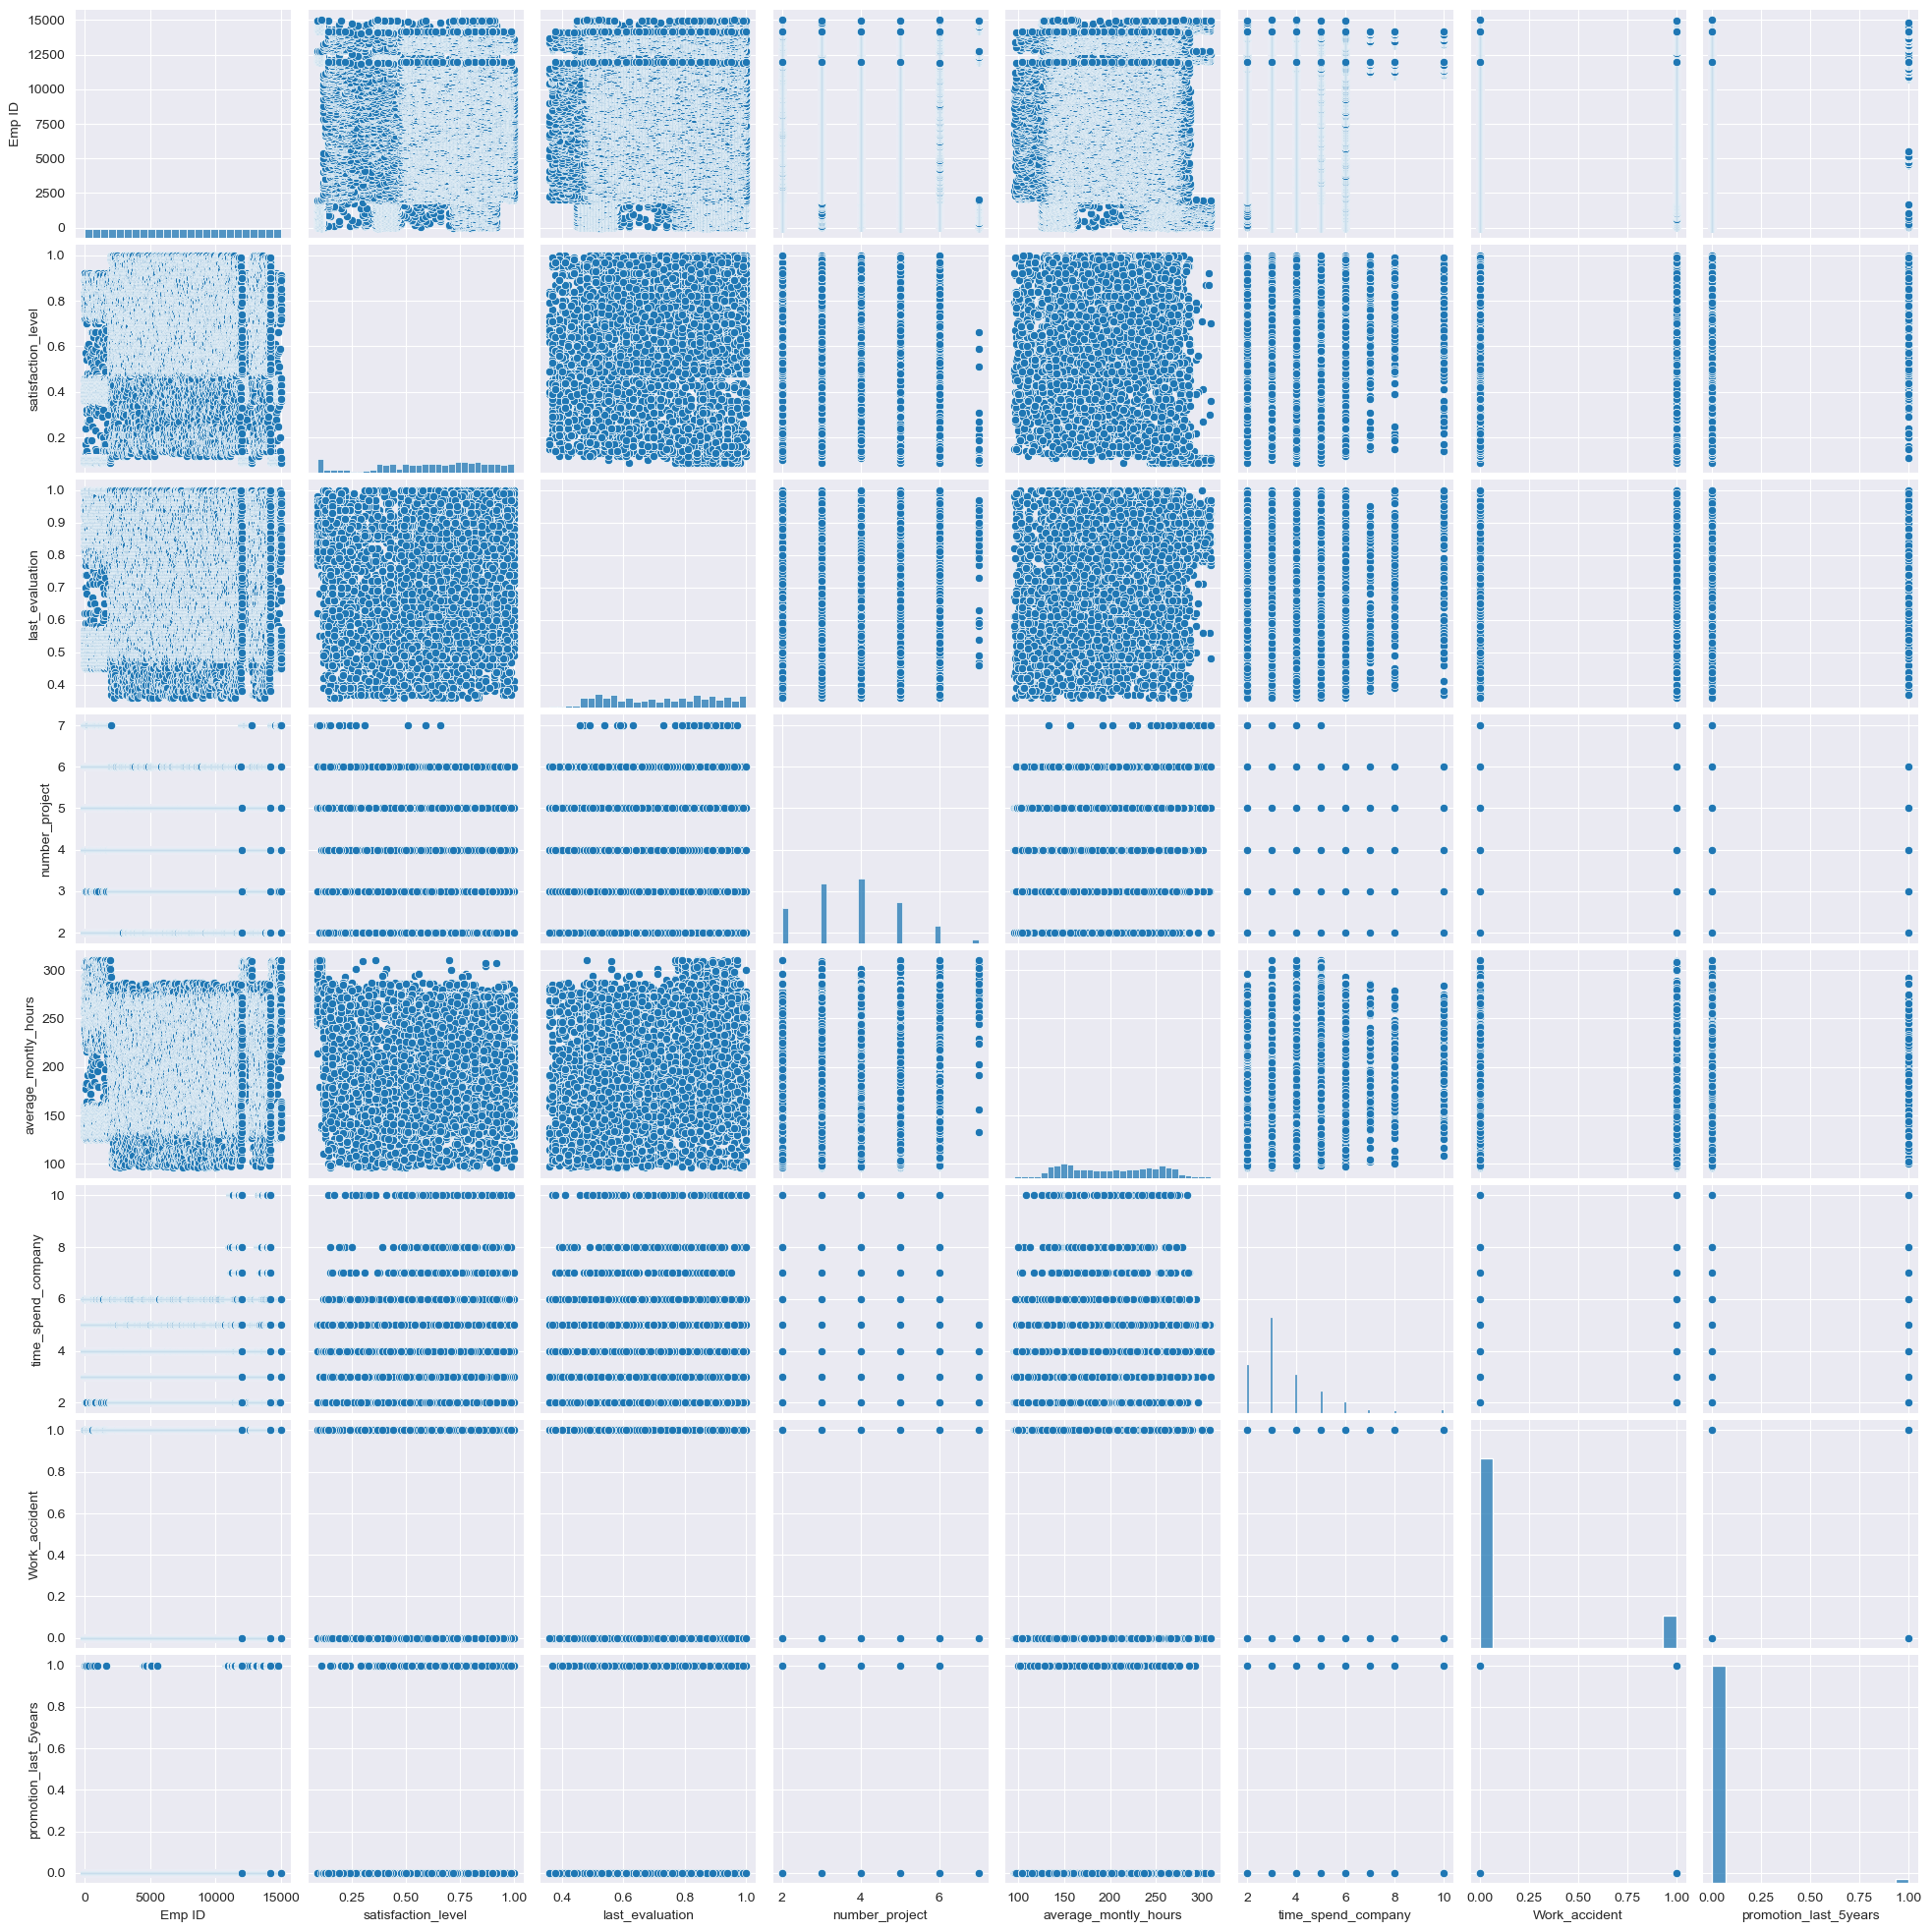

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6), dpi=600)  # Set the size and resolution of the figure
sns.pairplot(data=employee_df)  # Create the pair plot using the employee_df dataset
plt.show()  # Display the plot


Based on the pairplot figure, we can observe the scatter plots for each combination of variables in the employee_df dataset. It provides a quick overview of the relationships between different variables. By examining the diagonal plots, which represent the distribution of each variable, we can see the shape and spread of the data. The off-diagonal plots show the scatter plots between pairs of variables, allowing us to identify any linear or non-linear associations between them. This figure is useful for initial exploratory analysis and gaining insights into the relationships within the dataset.

In [68]:
emp = employee_df.drop('Emp ID', axis =1)

In [69]:
emp

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
11423                0.90             0.55               3   
11424                0.74             0.95               5   
11425                0.85             0.54               3   
11426                0.33             0.65               3   
11427                0.50             0.73               4   

       average_montly_hours  time_spend_company  Work_accident  \
0                       157                   3              0   
1                       262                   6              0   
2                       272                   4              0   
3                       223                   5              0   
4                       159                   3              0   
...                     ...                 ...            ...   
11423                   259                  10              1   
11424                   266                  10              0   
11425                   185                  10              0   
11426                   172                  10              0   
11427                   180                   3              0   

       promotion_last_5years        dept  salary Quit Attrition  
0                          0       sales     low  Yes         1  
1                          0       sales  medium  Yes         1  
2                          0       sales  medium  Yes         1  
3                          0       sales     low  Yes         1  
4                          0       sales     low  Yes         1  
...                      ...         ...     ...  ...       ...  
11423                      1  management    high   No         0  
11424                      1  management    high   No         0  
11425                      1  management    high   No         0  
11426                      1   marketing    high   No         0  
11427                      0          IT     low   No         0  

[14999 rows x 11 columns]

<Axes: >

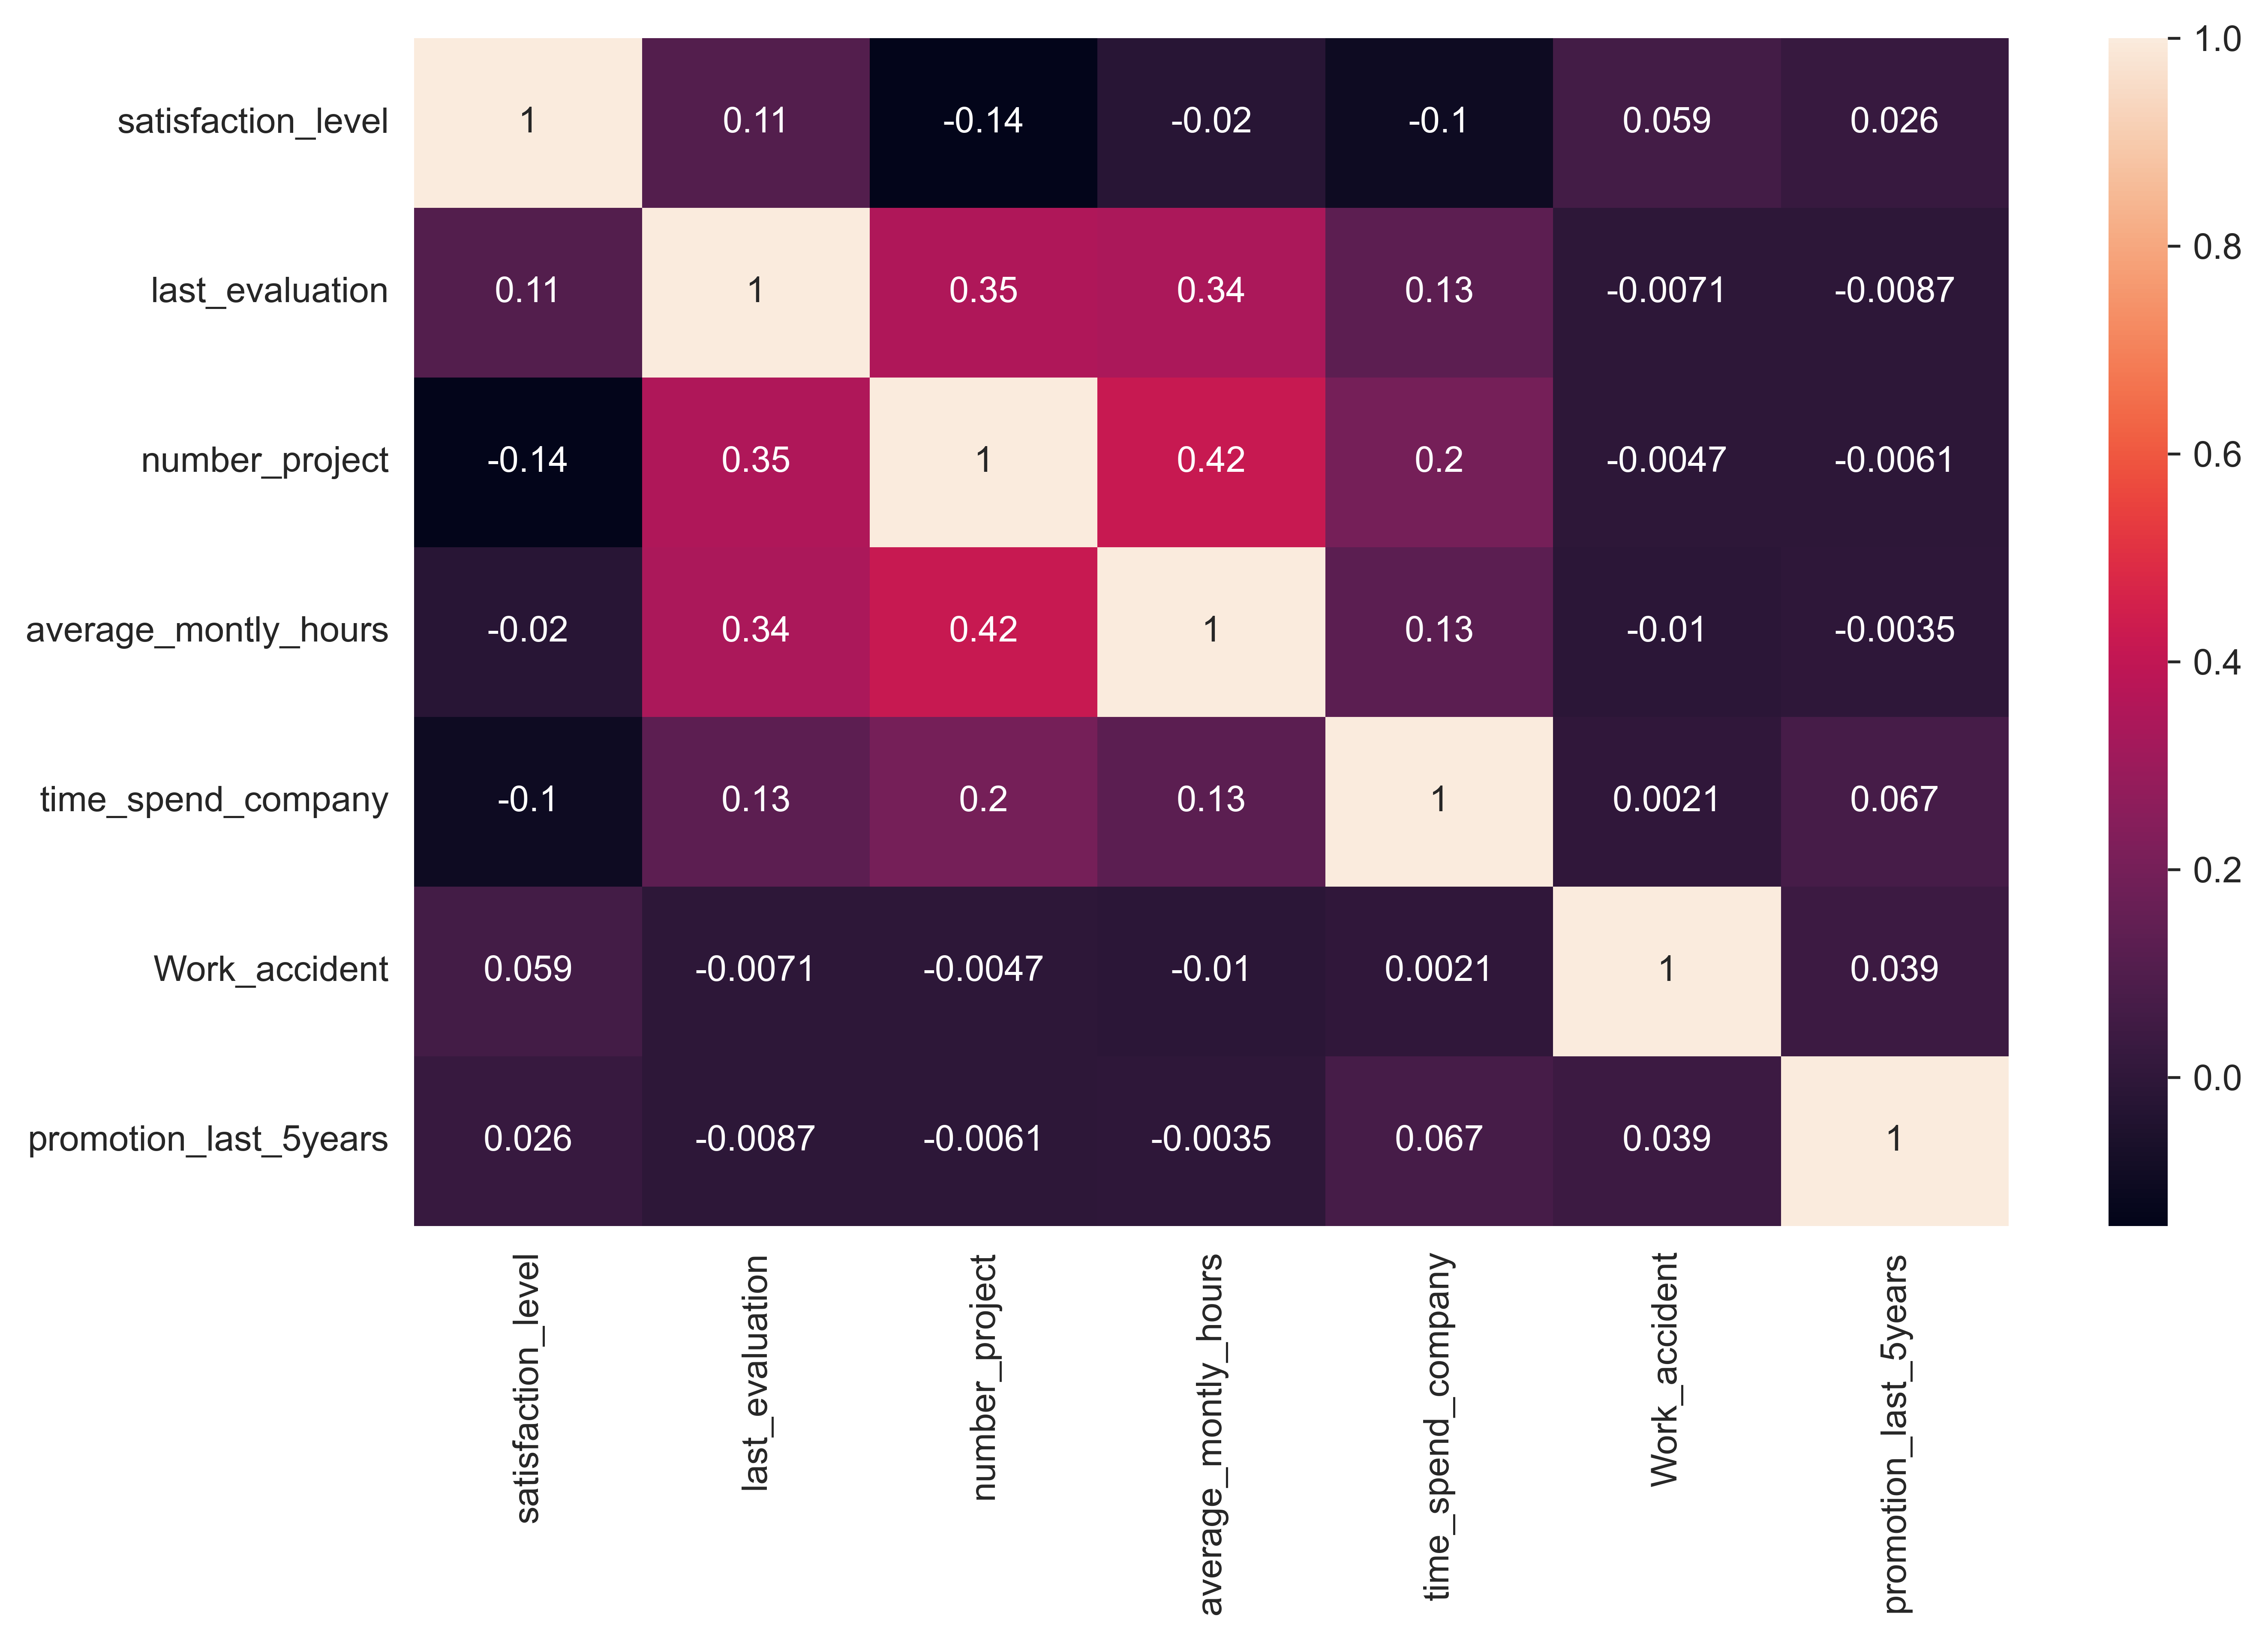

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6), dpi=600)
sns.heatmap(emp.corr(numeric_only=True), annot=True)


Based on the heatmap figure, it illustrates the correlation matrix of the variables in the emp DataFrame. The heatmap provides a visual representation of the correlation values between pairs of variables. The values range from -1 to 1, where a value close to 1 indicates a strong positive correlation, a value close to -1 indicates a strong negative correlation, and a value close to 0 indicates a weak or no correlation. The heatmap allows us to identify patterns and relationships between variables. Darker colors indicate stronger correlations, while lighter colors indicate weaker correlations. By examining the heatmap, we can identify variables that are positively or negatively correlated with each other. It is important to note that correlation does not imply causation and further analysis is required to understand the underlying relationships between variables.

<Axes: xlabel='salary', ylabel='time_spend_company'>

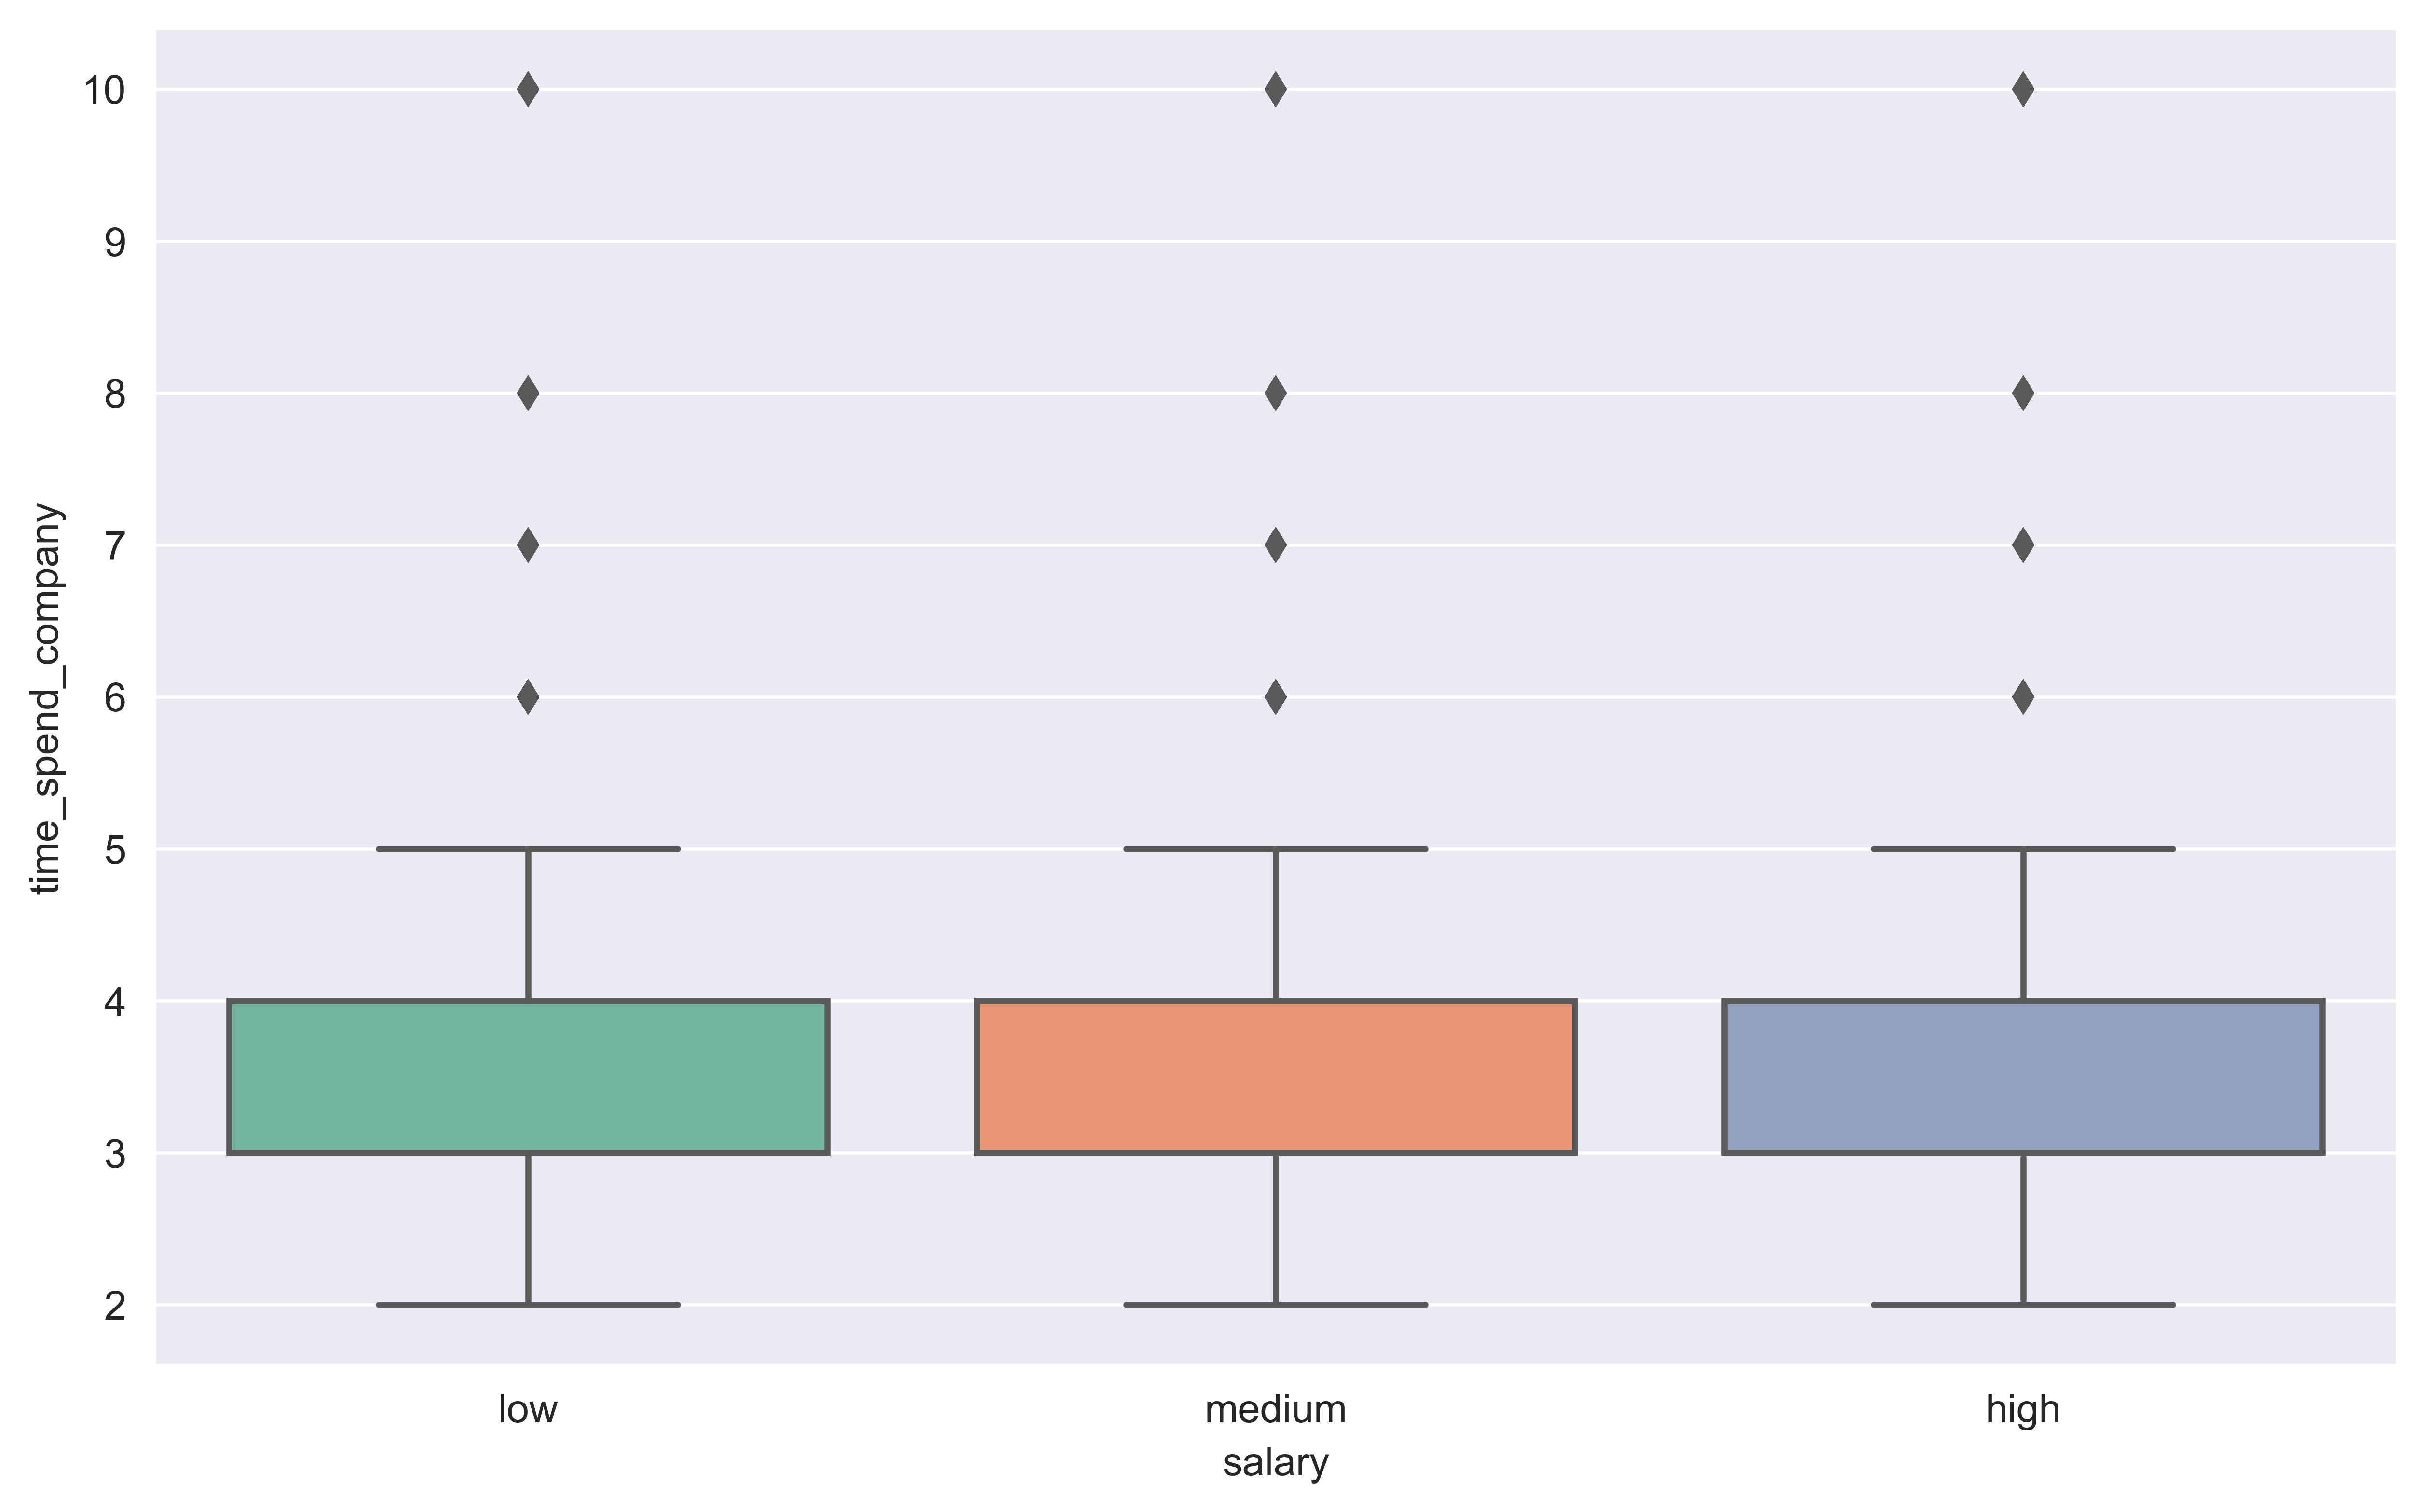

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6), dpi=600)
sns.boxplot(x='salary', y='time_spend_company', data=employee_df, palette='Set2')


The above figure shows the distribution of employee's time spent in the company (y-axis) across different salary levels (x-axis). Each box in the plot represents the interquartile range (IQR) of the time spent in the company for a specific salary level. The line inside the box represents the median, while the whiskers extend to show the range of the data within 1.5 times the IQR. Any data points beyond the whiskers are considered outliers and are plotted individually. This boxplot allows us to observe the variation in the time spent in the company for different salary levels. It can provide insights into potential relationships or differences between salary and employee tenure.

<Axes: xlabel='salary', ylabel='number_project'>

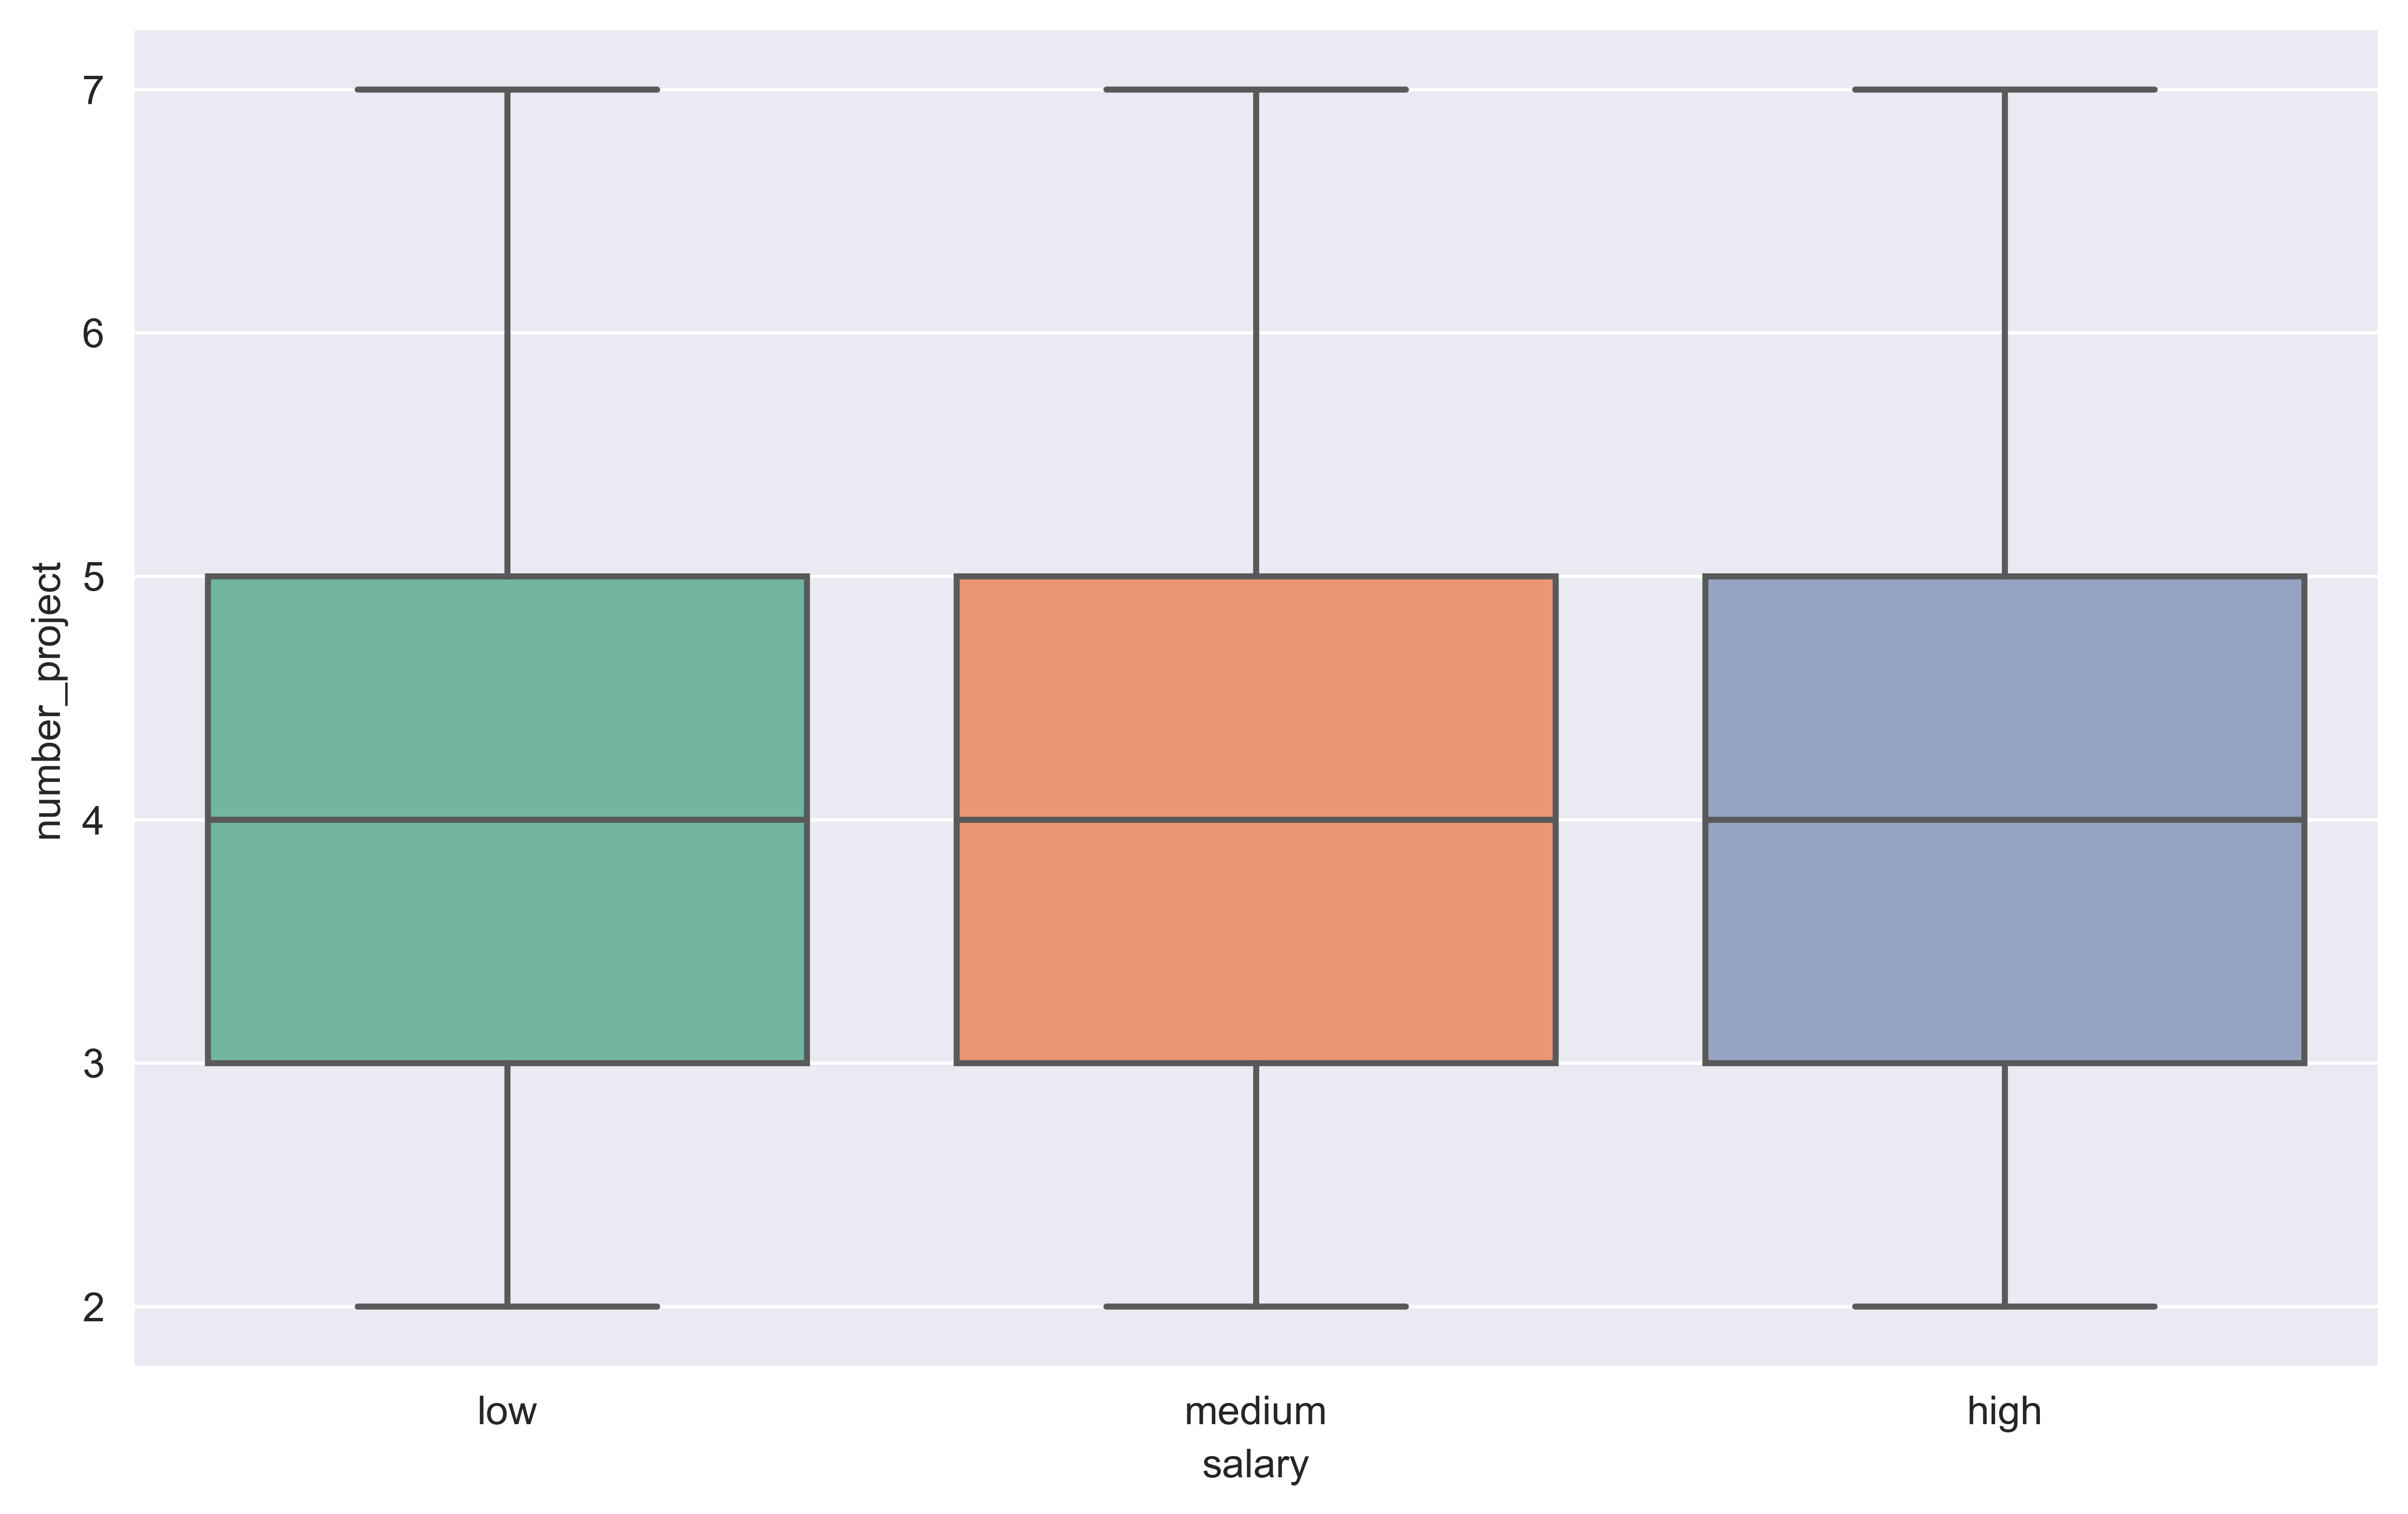

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6), dpi=600)
sns.boxplot(x='salary', y='number_project', data=employee_df, palette='Set2')


The above figure shows the distribution of the number of projects employees have worked on, categorised by different salary levels. It provides a visual representation of the central tendency, variability and any potential outliers in the number of projects for each salary group. The boxplot allows for easy comparison between different salary levels and helps identify any potential differences or patterns in project involvement based on salary.

In [74]:
employee_df

Emp ID  satisfaction_level  last_evaluation  number_project  \
0           1                0.38             0.53               2   
1           2                0.80             0.86               5   
2           3                0.11             0.88               7   
3           4                0.72             0.87               5   
4           5                0.37             0.52               2   
...       ...                 ...              ...             ...   
11423   14207                0.90             0.55               3   
11424   14208                0.74             0.95               5   
11425   14209                0.85             0.54               3   
11426   14210                0.33             0.65               3   
11427   14211                0.50             0.73               4   

       average_montly_hours  time_spend_company  Work_accident  \
0                       157                   3              0   
1                       262                   6              0   
2                       272                   4              0   
3                       223                   5              0   
4                       159                   3              0   
...                     ...                 ...            ...   
11423                   259                  10              1   
11424                   266                  10              0   
11425                   185                  10              0   
11426                   172                  10              0   
11427                   180                   3              0   

       promotion_last_5years        dept  salary Quit Attrition  
0                          0       sales     low  Yes         1  
1                          0       sales  medium  Yes         1  
2                          0       sales  medium  Yes         1  
3                          0       sales     low  Yes         1  
4                          0       sales     low  Yes         1  
...                      ...         ...     ...  ...       ...  
11423                      1  management    high   No         0  
11424                      1  management    high   No         0  
11425                      1  management    high   No         0  
11426                      1   marketing    high   No         0  
11427                      0          IT     low   No         0  

[14999 rows x 12 columns]

### Step 2: Data Preprocessing and Building the Model

In [76]:
# checking the count of unique labels
employee_df['Quit'].value_counts()

No     11428
Yes     3571
Name: Quit, dtype: int64

In [77]:
# One-hot encoding 
import pandas as pd
employee_df = pd.get_dummies(data=employee_df, columns=['Quit'], drop_first=True)

In [78]:
employee_df

Emp ID  satisfaction_level  last_evaluation  number_project  \
0           1                0.38             0.53               2   
1           2                0.80             0.86               5   
2           3                0.11             0.88               7   
3           4                0.72             0.87               5   
4           5                0.37             0.52               2   
...       ...                 ...              ...             ...   
11423   14207                0.90             0.55               3   
11424   14208                0.74             0.95               5   
11425   14209                0.85             0.54               3   
11426   14210                0.33             0.65               3   
11427   14211                0.50             0.73               4   

       average_montly_hours  time_spend_company  Work_accident  \
0                       157                   3              0   
1                       262                   6              0   
2                       272                   4              0   
3                       223                   5              0   
4                       159                   3              0   
...                     ...                 ...            ...   
11423                   259                  10              1   
11424                   266                  10              0   
11425                   185                  10              0   
11426                   172                  10              0   
11427                   180                   3              0   

       promotion_last_5years        dept  salary Attrition  Quit_Yes  
0                          0       sales     low         1         1  
1                          0       sales  medium         1         1  
2                          0       sales  medium         1         1  
3                          0       sales     low         1         1  
4                          0       sales     low         1         1  
...                      ...         ...     ...       ...       ...  
11423                      1  management    high         0         0  
11424                      1  management    high         0         0  
11425                      1  management    high         0         0  
11426                      1   marketing    high         0         0  
11427                      0          IT     low         0         0  

[14999 rows x 12 columns]

In [79]:
# checking the count of unique label
employee_df['salary'].value_counts()


low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [80]:
# creating a dict with the salary column label 
cleanup_salary_label = {'salary' :  {"low": 0, "medium": 1, "high": 2}}

In [81]:
# replacing the salary with clean_up column
employee_df = employee_df.replace(cleanup_salary_label)

In [82]:
# checking the replaced label
employee_df['salary'].value_counts()

0    7316
1    6446
2    1237
Name: salary, dtype: int64

In [83]:
# checking the count of unique labels
employee_df['dept'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: dept, dtype: int64

In [84]:
# one-hot encoding
employee_df = pd.get_dummies(employee_df, columns = ['dept'], drop_first =True)

In [85]:
employee_df

Emp ID  satisfaction_level  last_evaluation  number_project  \
0           1                0.38             0.53               2   
1           2                0.80             0.86               5   
2           3                0.11             0.88               7   
3           4                0.72             0.87               5   
4           5                0.37             0.52               2   
...       ...                 ...              ...             ...   
11423   14207                0.90             0.55               3   
11424   14208                0.74             0.95               5   
11425   14209                0.85             0.54               3   
11426   14210                0.33             0.65               3   
11427   14211                0.50             0.73               4   

       average_montly_hours  time_spend_company  Work_accident  \
0                       157                   3              0   
1                       262                   6              0   
2                       272                   4              0   
3                       223                   5              0   
4                       159                   3              0   
...                     ...                 ...            ...   
11423                   259                  10              1   
11424                   266                  10              0   
11425                   185                  10              0   
11426                   172                  10              0   
11427                   180                   3              0   

       promotion_last_5years  salary Attrition  Quit_Yes  dept_RandD  \
0                          0       0         1         1           0   
1                          0       1         1         1           0   
2                          0       1         1         1           0   
3                          0       0         1         1           0   
4                          0       0         1         1           0   
...                      ...     ...       ...       ...         ...   
11423                      1       2         0         0           0   
11424                      1       2         0         0           0   
11425                      1       2         0         0           0   
11426                      1       2         0         0           0   
11427                      0       0         0         0           0   

       dept_accounting  dept_hr  dept_management  dept_marketing  \
0                    0        0                0               0   
1                    0        0                0               0   
2                    0        0                0               0   
3                    0        0                0               0   
4                    0        0                0               0   
...                ...      ...              ...             ...   
11423                0        0                1               0   
11424                0        0                1               0   
11425                0        0                1               0   
11426                0        0                0               1   
11427                0        0                0               0   

       dept_product_mng  dept_sales  dept_support  dept_technical  
0                     0           1             0               0  
1                     0           1             0               0  
2                     0           1             0               0  
3                     0           1             0               0  
4                     0           1             0               0  
...                 ...         ...           ...             ...  
11423                 0           0             0               0  
11424                 0           0             0               0  
11425                 0           0             0               0  
11426      

In [86]:
# spliting the data to dependent amd independent variable
x = employee_df.drop(['Emp ID', 'Quit_Yes', 'Attrition'], axis=1)
y = employee_df['Attrition']


In [87]:
x

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
11423                0.90             0.55               3   
11424                0.74             0.95               5   
11425                0.85             0.54               3   
11426                0.33             0.65               3   
11427                0.50             0.73               4   

       average_montly_hours  time_spend_company  Work_accident  \
0                       157                   3              0   
1                       262                   6              0   
2                       272                   4              0   
3                       223                   5              0   
4                       159                   3              0   
...                     ...                 ...            ...   
11423                   259                  10              1   
11424                   266                  10              0   
11425                   185                  10              0   
11426                   172                  10              0   
11427                   180                   3              0   

       promotion_last_5years  salary  dept_RandD  dept_accounting  dept_hr  \
0                          0       0           0                0        0   
1                          0       1           0                0        0   
2                          0       1           0                0        0   
3                          0       0           0                0        0   
4                          0       0           0                0        0   
...                      ...     ...         ...              ...      ...   
11423                      1       2           0                0        0   
11424                      1       2           0                0        0   
11425                      1       2           0                0        0   
11426                      1       2           0                0        0   
11427                      0       0           0                0        0   

       dept_management  dept_marketing  dept_product_mng  dept_sales  \
0                    0               0                 0           1   
1                    0               0                 0           1   
2                    0               0                 0           1   
3                    0               0                 0           1   
4                    0               0                 0           1   
...                ...             ...               ...         ...   
11423                1               0                 0           0   
11424                1               0                 0           0   
11425                1               0                 0           0   
11426                0               1                 0           0   
11427                0               0                 0           0   

       dept_support  dept_technical  
0                 0               0  
1                 0               0  
2                 0               0  
3                 0               0  
4                 0               0  
...             ...             ...  
11423             0               0  
11424             0               0  
11425             0               0  
11426             0               0  
11427             0               0  

[14999 rows x 17 columns]

In [88]:
y

0        1
1        1
2        1
3        1
4        1
        ..
11423    0
11424    0
11425    0
11426    0
11427    0
Name: Attrition, Length: 14999, dtype: object

In [89]:
#importing libraries for modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier


In [90]:
# checking the % dist of attrition
y.value_counts(normalize= True)* 100

0    76.191746
1    23.808254
Name: Attrition, dtype: float64

The distribution of the dependent variable, 'Attrition', indicates a slight class imbalance:
- Class 0 (No attrition): 76.19%
- Class 1 (Attrition): 23.81%

This means that the majority of employees (76.19%) did not experience attrition, while a smaller portion (23.81%) did experience attrition.

In [91]:
# imstalling the imbalanced learn package
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable


In [92]:
from imblearn.over_sampling import SMOTE

In [93]:
# creating an object sm
sm = SMOTE()

In [94]:
#calling to see the inbalanced data
y.value_counts()

0    11428
1     3571
Name: Attrition, dtype: int64

In [95]:
# resampling x and y
x_resampled, y_resampled = sm.fit_resample(x,y)

In [96]:
# calling the resampled 
x_resampled

satisfaction_level  last_evaluation  number_project  \
0                0.380000         0.530000               2   
1                0.800000         0.860000               5   
2                0.110000         0.880000               7   
3                0.720000         0.870000               5   
4                0.370000         0.520000               2   
...                   ...              ...             ...   
22851            0.850068         0.849932               4   
22852            0.400009         0.514998               2   
22853            0.090000         0.850000               6   
22854            0.718603         0.900964               3   
22855            0.908292         0.957563               4   

       average_montly_hours  time_spend_company  Work_accident  \
0                       157                   3              0   
1                       262                   6              0   
2                       272                   4              0   
3                       223                   5              0   
4                       159                   3              0   
...                     ...                 ...            ...   
22851                   246                   6              0   
22852                   155                   3              0   
22853                   289                   4              0   
22854                   241                   4              0   
22855                   219                   5              0   

       promotion_last_5years  salary  dept_RandD  dept_accounting  dept_hr  \
0                          0       0           0                0        0   
1                          0       1           0                0        0   
2                          0       1           0                0        0   
3                          0       0           0                0        0   
4                          0       0           0                0        0   
...                      ...     ...         ...              ...      ...   
22851                      0       0           0                0        0   
22852                      0       1           0                0        0   
22853                      0       2           0                0        1   
22854                      0       0           0                0        0   
22855                      0       0           0                0        0   

       dept_management  dept_marketing  dept_product_mng  dept_sales  \
0                    0               0                 0           1   
1                    0               0                 0           1   
2                    0               0                 0           1   
3                    0               0                 0           1   
4                    0               0                 0           1   
...                ...             ...               ...         ...   
22851                0               0                 0           0   
22852                0               0                 0           0   
22853                0               0                 0           0   
22854                0               0                 0           0   
22855                0               0                 0           0   

       dept_support  dept_technical  
0                 0               0  
1                 0               0  
2                 0               0  
3                 0               0  
4                 0               0  
...             ...             ...  
22851             0               0  
22852             0               1  
22853             0               0  
22854             0               1  
22855             0               1  

[22856 rows x 17 columns]

In [97]:
# calling the resampled
y_resampled.value_counts()

1    11428
0    11428
Name: Attrition, dtype: int64

In [98]:
# splitting the dependent and independent variable to test and train
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size = 0.4, random_state= 1, shuffle = True) 


In [99]:
# calling the trained independent variable
x_train

satisfaction_level  last_evaluation  number_project  \
9520                 0.76          0.99000               3   
7455                 0.98          0.74000               4   
13341                0.88          0.53000               3   
9747                 0.74          0.69000               4   
11575                0.75          0.63000               3   
...                   ...              ...             ...   
10955                0.88          0.66000               3   
17289                0.10          0.81526               6   
5192                 0.98          0.89000               4   
12172                0.85          0.99000               3   
235                  0.83          0.85000               4   

       average_montly_hours  time_spend_company  Work_accident  \
9520                    166                   3              0   
7455                    260                   2              1   
13341                   218                   4              0   
9747                    244                   2              0   
11575                   148                   4              0   
...                     ...                 ...            ...   
10955                   178                   3              0   
17289                   286                   4              0   
5192                    169                   3              0   
12172                   208                   2              0   
235                     255                   5              0   

       promotion_last_5years  salary  dept_RandD  dept_accounting  dept_hr  \
9520                       0       1           0                0        0   
7455                       0       0           0                0        0   
13341                      0       0           0                0        0   
9747                       0       0           0                0        0   
11575                      0       1           0                0        0   
...                      ...     ...         ...              ...      ...   
10955                      0       2           1                0        0   
17289                      0       0           0                0        0   
5192                       0       1           0                0        0   
12172                      0       0           0                0        0   
235                        0       0           0                0        0   

       dept_management  dept_marketing  dept_product_mng  dept_sales  \
9520                 0               0                 0           1   
7455                 0               1                 0           0   
13341                0               0                 0           1   
9747                 0               0                 0           1   
11575                0               0                 0           0   
...                ...             ...               ...         ...   
10955                0               0                 0           0   
17289                0               0                 1           0   
5192                 0               0                 0           0   
12172                0               0                 1           0   
235                  1               0                 0           0   

       dept_support  dept_technical  
9520              0               0  
7455              0               0  
13341             0               0  
9747              0               0  
11575             0               1  
...             ...             ...  
10955             0               0  
17289             0               0  
5192              0               1  
12172             0               0  
235               0               0  

[13713 rows x 17 columns]

In [103]:
# Importing the logistic regression model
from sklearn.linear_model import LogisticRegression

# Creating an instance of Logistic Regression
lr = LogisticRegression()

# Fitting the logistic regression model to the training data
lr.fit(x_train, y_train)


C:\FEENAH ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [104]:
# checking the score of the test
lr.score(x_test, y_test)

0.7837690036093186

In [105]:
# checking the score of the train
lr.score(x_train, y_train)

0.7867716765113396

In [106]:
# making prediction off the tested independent variable 
y_pred = lr.predict(x_test)

In [107]:
# Making predictions on the test set using the trained logistic regression model
y_pred = lr.predict(x_test)


In [109]:
# Printing the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))
print('\n')

# Printing the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print('\n')

# Calculating and printing the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score: {:.2%}".format(accuracy))



Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.76      0.78      4580
           1       0.77      0.81      0.79      4563

    accuracy                           0.78      9143
   macro avg       0.78      0.78      0.78      9143
weighted avg       0.78      0.78      0.78      9143



Confusion Matrix:
[[3471 1109]
 [ 868 3695]]


Accuracy Score: 78.38%


Not recommended 

In [110]:
# using decisionTreeClassifier algorithm
dt = DecisionTreeClassifier()

In [111]:
# passing the train data to DecisiontreeClassifier
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [112]:
# checking the score of the test
dt.score(x_test, y_test)

0.9674067592693865

In [113]:
# checking the score of the train
dt.score(x_train, y_train)

1.0

In [115]:
# Making predictions on the test set using the trained decision tree classifier
y_pred = dt.predict(x_test)


In [116]:
# Printing the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))
print('\n')

# Printing the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print('\n')

# Calculating and printing the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score: {:.2%}".format(accuracy))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      4580
           1       0.96      0.97      0.97      4563

    accuracy                           0.97      9143
   macro avg       0.97      0.97      0.97      9143
weighted avg       0.97      0.97      0.97      9143



Confusion Matrix:
[[4409  171]
 [ 127 4436]]


Accuracy Score: 96.74%


Slightly recommended

In [117]:
# using randomForestClassifier
rf = RandomForestClassifier()


In [118]:
# passing the train data to randomForestClassifier
rf.fit(x_train, y_train)

RandomForestClassifier()

In [119]:
# checking the score of the train
rf.score(x_train, y_train)

1.0

In [120]:
# checking the score of the test
rf.score(x_test, y_test)

0.9819534069780159

In [121]:
# making prediction off the tested independent variable 
y_pred = rf.predict(x_test)

In [122]:
# calling the id of employee existing in the organization
existing_emp['Emp ID']

0         2001
1         2002
2         2003
3         2004
4         2005
         ...  
11423    14207
11424    14208
11425    14209
11426    14210
11427    14211
Name: Emp ID, Length: 11428, dtype: int64

In [123]:
# calling the dataframe
existing_emp

Emp ID  satisfaction_level  last_evaluation  number_project  \
0        2001                0.58             0.74               4   
1        2002                0.82             0.67               2   
2        2003                0.45             0.69               5   
3        2004                0.78             0.82               5   
4        2005                0.49             0.60               3   
...       ...                 ...              ...             ...   
11423   14207                0.90             0.55               3   
11424   14208                0.74             0.95               5   
11425   14209                0.85             0.54               3   
11426   14210                0.33             0.65               3   
11427   14211                0.50             0.73               4   

       average_montly_hours  time_spend_company  Work_accident  \
0                       215                   3              0   
1                       202                   3              0   
2                       193                   3              0   
3                       247                   3              0   
4                       214                   2              0   
...                     ...                 ...            ...   
11423                   259                  10              1   
11424                   266                  10              0   
11425                   185                  10              0   
11426                   172                  10              0   
11427                   180                   3              0   

       promotion_last_5years        dept salary Quit Attrition  
0                          0       sales    low   No         0  
1                          0       sales    low   No         0  
2                          0       sales    low   No         0  
3                          0       sales    low   No         0  
4                          0       sales    low   No         0  
...                      ...         ...    ...  ...       ...  
11423                      1  management   high   No         0  
11424                      1  management   high   No         0  
11425                      1  management   high   No         0  
11426                      1   marketing   high   No         0  
11427                      0          IT    low   No         0  

[11428 rows x 12 columns]

In [124]:
# one -hot encoding of dept column
existing_emp = pd.get_dummies(existing_emp, columns = ['dept'], drop_first = True )

In [125]:
# creating a dict to encode the label 
existing_employee_clean_salary = {'salary' : {'low': 0, 'medium' : 1, 'high' : 2}}

In [126]:
# replacing with classification value
existing_emp = existing_emp.replace(existing_employee_clean_salary)

In [127]:
 # splitting the independent and dependent variable
x_existing_employee = existing_emp.drop(['Emp ID', 'Quit', 'Attrition'],  axis = 1)
y_existing_employee = ['Attrition']

In [128]:
# calling the independent variable
x_existing_employee

satisfaction_level  last_evaluation  number_project  \
0                    0.58             0.74               4   
1                    0.82             0.67               2   
2                    0.45             0.69               5   
3                    0.78             0.82               5   
4                    0.49             0.60               3   
...                   ...              ...             ...   
11423                0.90             0.55               3   
11424                0.74             0.95               5   
11425                0.85             0.54               3   
11426                0.33             0.65               3   
11427                0.50             0.73               4   

       average_montly_hours  time_spend_company  Work_accident  \
0                       215                   3              0   
1                       202                   3              0   
2                       193                   3              0   
3                       247                   3              0   
4                       214                   2              0   
...                     ...                 ...            ...   
11423                   259                  10              1   
11424                   266                  10              0   
11425                   185                  10              0   
11426                   172                  10              0   
11427                   180                   3              0   

       promotion_last_5years  salary  dept_RandD  dept_accounting  dept_hr  \
0                          0       0           0                0        0   
1                          0       0           0                0        0   
2                          0       0           0                0        0   
3                          0       0           0                0        0   
4                          0       0           0                0        0   
...                      ...     ...         ...              ...      ...   
11423                      1       2           0                0        0   
11424                      1       2           0                0        0   
11425                      1       2           0                0        0   
11426                      1       2           0                0        0   
11427                      0       0           0                0        0   

       dept_management  dept_marketing  dept_product_mng  dept_sales  \
0                    0               0                 0           1   
1                    0               0                 0           1   
2                    0               0                 0           1   
3                    0               0                 0           1   
4                    0               0                 0           1   
...                ...             ...               ...         ...   
11423                1               0                 0           0   
11424                1               0                 0           0   
11425                1               0                 0           0   
11426                0               1                 0           0   
11427                0               0                 0           0   

       dept_support  dept_technical  
0                 0               0  
1                 0               0  
2                 0               0  
3                 0               0  
4                 0               0  
...             ...             ...  
11423             0               0  
11424             0               0  
11425             0               0  
11426             0               0  
11427             0               0  

[11428 rows x 17 columns]

In [129]:
# predicting with all the independent data not with test_size
pred_rf = rf.predict(x_existing_employee)

In [130]:
# attaching the predicted outcome to respective employee id and turning into dataframe
pred_dat = pd.DataFrame({'Emp ID': existing_emp['Emp ID'], 'prone_to_leave':pred_rf })

In [131]:
# calling the dataframe
pred_dat

Emp ID prone_to_leave
0        2001              0
1        2002              0
2        2003              0
3        2004              0
4        2005              0
...       ...            ...
11423   14207              0
11424   14208              0
11425   14209              0
11426   14210              0
11427   14211              0

[11428 rows x 2 columns]

In [132]:
pred_dat.to_csv('RandomForest prediction.csv')

In [133]:
# counting the values of employee to leave or not
pred_dat['prone_to_leave'].value_counts()

0    11397
1       31
Name: prone_to_leave, dtype: int64

In [134]:
# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))
print('\n')

# Print the accuracy score
print("Accuracy Score: {:.2%}".format(accuracy_score(y_test, y_pred)))
print('\n')

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4580
           1       0.99      0.97      0.98      4563

    accuracy                           0.98      9143
   macro avg       0.98      0.98      0.98      9143
weighted avg       0.98      0.98      0.98      9143



Accuracy Score: 98.20%


Confusion Matrix:
[[4549   31]
 [ 134 4429]]


Based on the evaluation results, the RandomForestClassifier demonstrates the best performance among all the models, achieving the highest accuracy score of 0.98. This model is recommended for predicting employees who are likely to quit the organisation. Furthermore, the number of False Positives (FP) and False Negatives (FN) is relatively low, indicating that the model has good precision and recall.

In [135]:
# using SVC 
svc = SVC()


In [137]:
# passing the train data to SVC
svc.fit(x_train, y_train)


SVC()

In [138]:
# checking the score of the train
svc.score(x_train, y_train)


0.6901480347115876

In [139]:
# checking the score of the test
svc.score(x_test, y_test)

0.6913485726785519

In [140]:
# making prediction off the tested independent variable 
y_pred = svc.predict(x_test)

In [142]:
# Print the classification report
print(classification_report(y_test, y_pred))
print('\n')

# Print the accuracy score
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\n')

# Print the confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.70      0.68      0.69      4580
           1       0.69      0.70      0.69      4563

    accuracy                           0.69      9143
   macro avg       0.69      0.69      0.69      9143
weighted avg       0.69      0.69      0.69      9143



Accuracy: 0.6913485726785519


Confusion Matrix:
[[3129 1451]
 [1371 3192]]


Not recommended

In [143]:
# using  DummyClassifier 
dc =  DummyClassifier ()


In [144]:
# passing the train data to DummyClassifier
dc.fit(x_train, y_train)


DummyClassifier()

In [145]:
# checking the score of the train
dc.score(x_train, y_train)


0.5006198497775833

In [146]:
# checking the score of the test
dc.score(x_test, y_test)

0.49907032702614024

In [147]:
# making prediction off the tested independent variable 
y_pred = dc.predict(x_test)


In [149]:
# Print the classification report with zero_division parameter set to 1
print(classification_report(y_test, y_pred, zero_division=1))
print('\n')

# Print the confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\n')

# Print the accuracy score
print('Accuracy:', accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.00      0.00      4580
           1       0.50      1.00      0.67      4563

    accuracy                           0.50      9143
   macro avg       0.75      0.50      0.33      9143
weighted avg       0.75      0.50      0.33      9143



Confusion Matrix:
[[   0 4580]
 [   0 4563]]


Accuracy: 0.49907032702614024


Not recommended 